In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importing yearly data of every team in years with a World Series: 1903, 1905-1993, 1995-2018
teams = pd.read_csv("Teams.csv")
teams = teams[(teams["yearID"] >= 1903) & (teams["yearID"] != 1904)
              & (teams["yearID"] != 1994)].reset_index(drop=True)
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1903,AL,BOS,BOS,NaN,1,141,70.0,91,47,NaN,NaN,Y,Y,708,4919,1336,222,113,48,261.0,559.0,141.0,NaN,36.0,NaN,504,358,2.57,123,20,4,3765,1142,23,269,579,239,86,0.959,Boston Americans,Huntington Avenue Grounds,379338.0,105,102,BOS,BOS,BOS
1,1903,NL,BRO,LAD,NaN,5,139,73.0,70,66,NaN,NaN,N,N,667,4534,1201,177,56,15,522.0,516.0,273.0,NaN,53.0,NaN,682,467,3.44,118,11,4,3664,1276,18,377,438,284,98,0.951,Brooklyn Superbas,Washington Park III,224670.0,97,98,BRO,BRO,BRO
2,1903,NL,BSN,ATL,NaN,6,140,68.0,58,80,NaN,NaN,N,N,578,4682,1145,176,47,25,398.0,495.0,159.0,NaN,59.0,NaN,699,456,3.34,125,8,1,3686,1310,30,460,516,361,89,0.939,Boston Beaneaters,South End Grounds III,143155.0,96,98,BSN,BSN,BSN
3,1903,AL,CHA,CHW,NaN,7,138,70.0,60,77,NaN,NaN,N,N,516,4670,1152,176,49,14,325.0,538.0,180.0,NaN,38.0,NaN,613,414,3.02,114,9,4,3705,1233,23,287,391,297,85,0.949,Chicago White Sox,South Side Park II,286183.0,96,95,CHW,CHA,CHA
4,1903,NL,CHN,CHC,NaN,3,139,73.0,82,56,NaN,NaN,N,N,695,4733,1300,191,62,9,422.0,455.0,259.0,NaN,50.0,NaN,599,382,2.77,117,6,6,3721,1182,14,354,451,338,78,0.942,Chicago Cubs,West Side Park II,386205.0,97,96,CHC,CHN,CHN


In [3]:
# Adding WinPct, RunDiff, and RunDiff/G to teams
teams["G/T"] = teams["W"] + teams["L"] # A column for just games that did not end in ties
teams["WinPct"] = (teams["W"] / (teams["G/T"]))
teams["RunDiff"] = teams["R"] - teams["RA"]
teams["RunDiff/G"] = teams["RunDiff"] / teams["G"]
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G
0,1903,AL,BOS,BOS,NaN,1,141,70.0,91,47,NaN,NaN,Y,Y,708,4919,1336,222,113,48,261.0,559.0,141.0,NaN,36.0,NaN,504,358,2.57,123,20,4,3765,1142,23,269,579,239,86,0.959,Boston Americans,Huntington Avenue Grounds,379338.0,105,102,BOS,BOS,BOS,138,0.659420,204,1.446809
1,1903,NL,BRO,LAD,NaN,5,139,73.0,70,66,NaN,NaN,N,N,667,4534,1201,177,56,15,522.0,516.0,273.0,NaN,53.0,NaN,682,467,3.44,118,11,4,3664,1276,18,377,438,284,98,0.951,Brooklyn Superbas,Washington Park III,224670.0,97,98,BRO,BRO,BRO,136,0.514706,-15,-0.107914
2,1903,NL,BSN,ATL,NaN,6,140,68.0,58,80,NaN,NaN,N,N,578,4682,1145,176,47,25,398.0,495.0,159.0,NaN,59.0,NaN,699,456,3.34,125,8,1,3686,1310,30,460,516,361,89,0.939,Boston Beaneaters,South End Grounds III,143155.0,96,98,BSN,BSN,BSN,138,0.420290,-121,-0.864286
3,1903,AL,CHA,CHW,NaN,7,138,70.0,60,77,NaN,NaN,N,N,516,4670,1152,176,49,14,325.0,538.0,180.0,NaN,38.0,NaN,613,414,3.02,114,9,4,3705,1233,23,287,391,297,85,0.949,Chicago White Sox,South Side Park II,286183.0,96,95,CHW,CHA,CHA,137,0.437956,-97,-0.702899
4,1903,NL,CHN,CHC,NaN,3,139,73.0,82,56,NaN,NaN,N,N,695,4733,1300,191,62,9,422.0,455.0,259.0,NaN,50.0,NaN,599,382,2.77,117,6,6,3721,1182,14,354,451,338,78,0.942,Chicago Cubs,West Side Park II,386205.0,97,96,CHC,CHN,CHN,138,0.594203,96,0.690647


In [4]:
# Creating TeamYearID, a way to identify all the teams
teams["TeamYearID"] = teams["franchID"] + teams["yearID"].astype(str)
TeamYearIDs = teams["TeamYearID"].to_list()

In [5]:
# WC is a dataframe for World Champions, WCIDs is a list of all the World Series winning teams
WC = teams[teams["WSWin"] == "Y"].reset_index(drop=True)
WCIDs = WC["TeamYearID"].to_list()
WC.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID
0,1903,AL,BOS,BOS,NaN,1,141,70.0,91,47,NaN,NaN,Y,Y,708,4919,1336,222,113,48,261.0,559.0,141.0,NaN,36.0,NaN,504,358,2.57,123,20,4,3765,1142,23,269,579,239,86,0.959,Boston Americans,Huntington Avenue Grounds,379338.0,105,102,BOS,BOS,BOS,138,0.659420,204,1.446809,BOS1903
1,1905,NL,NY1,SFG,NaN,1,155,76.0,105,48,NaN,NaN,Y,Y,780,5094,1392,191,88,39,517.0,497.0,291.0,NaN,90.0,NaN,505,364,2.39,117,18,15,4110,1160,25,364,760,258,93,0.960,New York Giants,Polo Grounds III,552700.0,102,98,NYG,NY1,NY1,153,0.686275,275,1.774194,SFG1905
2,1906,AL,CHA,CHW,NaN,1,154,79.0,93,58,NaN,NaN,Y,Y,570,4925,1133,152,52,7,453.0,492.0,216.0,NaN,50.0,NaN,460,326,2.13,117,32,4,4126,1212,11,255,543,243,80,0.963,Chicago White Sox,South Side Park II,585202.0,98,95,CHW,CHA,CHA,151,0.615894,110,0.714286,CHW1906
3,1907,NL,CHN,CHC,NaN,1,155,76.0,107,45,NaN,NaN,Y,Y,574,4892,1224,162,48,13,435.0,449.0,235.0,NaN,48.0,NaN,390,264,1.73,114,32,8,4120,1054,11,402,586,211,110,0.967,Chicago Cubs,West Side Park II,422550.0,106,101,CHC,CHN,CHN,152,0.703947,184,1.187097,CHC1907
4,1908,NL,CHN,CHC,NaN,1,158,78.0,99,55,NaN,NaN,Y,Y,624,5085,1267,196,56,19,418.0,520.0,212.0,NaN,40.0,NaN,461,341,2.14,108,29,12,4301,1137,20,437,668,205,76,0.969,Chicago Cubs,West Side Park II,665325.0,104,100,CHC,CHN,CHN,154,0.642857,163,1.031646,CHC1908


## Graphs of using Win Percentage of World Champions

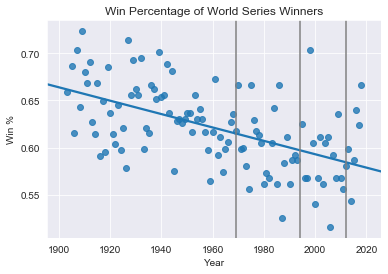

,yearID,WinPct
yearID,1.000000,-0.547488
WinPct,-0.547488,1.000000


In [6]:
# Plot of the Win Percentage of World Series Winners
# Vertical lines mark changes in playoff format
sns.regplot(x="yearID", y="WinPct", data=WC, ci=None)
plt.axvline(1969, color="gray")
plt.axvline(1994, color="gray")
plt.axvline(2012, color="gray")
plt.xlabel("Year")
plt.ylabel("Win %")
plt.title("Win Percentage of World Series Winners")
plt.show()
WC.loc[:, ["yearID", "WinPct"]].corr()

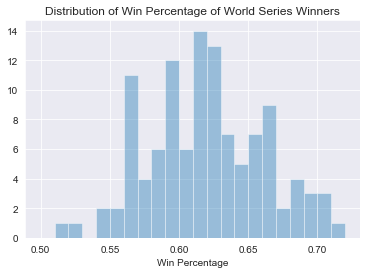

In [7]:
# Histogram of Win Percentage of World Series Winners
sns.distplot(a = WC["WinPct"], bins = np.arange(.5, .73, .01), kde=False)
plt.xlabel("Win Percentage")
plt.title("Distribution of Win Percentage of World Series Winners")
plt.show()

## Useful dictionaries 

In [8]:
# years is a list for all years with a World Series: 1903, 1905-1993, 1995-2018
years = WC["yearID"].to_list()

In [9]:
# YearsWCRetro is a dict mapping a year to teamIDretro
YearsWCRetro = WC.loc[:, ["yearID", "teamIDretro"]].reset_index(drop=True)
YearsWCRetro.set_index("yearID", inplace=True)
YearsWCRetro = YearsWCRetro.to_dict()["teamIDretro"]
YearsWCRetro

{1903: 'BOS',
 1905: 'NY1',
 1906: 'CHA',
 1907: 'CHN',
 1908: 'CHN',
 1909: 'PIT',
 1910: 'PHA',
 1911: 'PHA',
 1912: 'BOS',
 1913: 'PHA',
 1914: 'BSN',
 1915: 'BOS',
 1916: 'BOS',
 1917: 'CHA',
 1918: 'BOS',
 1919: 'CIN',
 1920: 'CLE',
 1921: 'NY1',
 1922: 'NY1',
 1923: 'NYA',
 1924: 'WS1',
 1925: 'PIT',
 1926: 'SLN',
 1927: 'NYA',
 1928: 'NYA',
 1929: 'PHA',
 1930: 'PHA',
 1931: 'SLN',
 1932: 'NYA',
 1933: 'NY1',
 1934: 'SLN',
 1935: 'DET',
 1936: 'NYA',
 1937: 'NYA',
 1938: 'NYA',
 1939: 'NYA',
 1940: 'CIN',
 1941: 'NYA',
 1942: 'SLN',
 1943: 'NYA',
 1944: 'SLN',
 1945: 'DET',
 1946: 'SLN',
 1947: 'NYA',
 1948: 'CLE',
 1949: 'NYA',
 1950: 'NYA',
 1951: 'NYA',
 1952: 'NYA',
 1953: 'NYA',
 1954: 'NY1',
 1955: 'BRO',
 1956: 'NYA',
 1957: 'MLN',
 1958: 'NYA',
 1959: 'LAN',
 1960: 'PIT',
 1961: 'NYA',
 1962: 'NYA',
 1963: 'LAN',
 1964: 'SLN',
 1965: 'LAN',
 1966: 'BAL',
 1967: 'SLN',
 1968: 'DET',
 1969: 'NYN',
 1970: 'BAL',
 1971: 'PIT',
 1972: 'OAK',
 1973: 'OAK',
 1974: 'OAK',
 1975:

In [10]:
# YearsWCFranch is a dict mapping a year to the World Champion's franchID 
YearsWCFranch = WC.loc[:, ["yearID", "franchID"]]
YearsWCFranch.set_index("yearID", inplace=True)
YearsWCFranch = YearsWCFranch.to_dict()["franchID"]
YearsWCFranch

{1903: 'BOS',
 1905: 'SFG',
 1906: 'CHW',
 1907: 'CHC',
 1908: 'CHC',
 1909: 'PIT',
 1910: 'OAK',
 1911: 'OAK',
 1912: 'BOS',
 1913: 'OAK',
 1914: 'ATL',
 1915: 'BOS',
 1916: 'BOS',
 1917: 'CHW',
 1918: 'BOS',
 1919: 'CIN',
 1920: 'CLE',
 1921: 'SFG',
 1922: 'SFG',
 1923: 'NYY',
 1924: 'MIN',
 1925: 'PIT',
 1926: 'STL',
 1927: 'NYY',
 1928: 'NYY',
 1929: 'OAK',
 1930: 'OAK',
 1931: 'STL',
 1932: 'NYY',
 1933: 'SFG',
 1934: 'STL',
 1935: 'DET',
 1936: 'NYY',
 1937: 'NYY',
 1938: 'NYY',
 1939: 'NYY',
 1940: 'CIN',
 1941: 'NYY',
 1942: 'STL',
 1943: 'NYY',
 1944: 'STL',
 1945: 'DET',
 1946: 'STL',
 1947: 'NYY',
 1948: 'CLE',
 1949: 'NYY',
 1950: 'NYY',
 1951: 'NYY',
 1952: 'NYY',
 1953: 'NYY',
 1954: 'SFG',
 1955: 'LAD',
 1956: 'NYY',
 1957: 'ATL',
 1958: 'NYY',
 1959: 'LAD',
 1960: 'PIT',
 1961: 'NYY',
 1962: 'NYY',
 1963: 'LAD',
 1964: 'STL',
 1965: 'LAD',
 1966: 'BAL',
 1967: 'STL',
 1968: 'DET',
 1969: 'NYM',
 1970: 'BAL',
 1971: 'PIT',
 1972: 'OAK',
 1973: 'OAK',
 1974: 'OAK',
 1975:

In [11]:
# FanGraphstoFranchID is a dict from FanGraphs team names to Lahman database's franchID
# Washington Senators is not included because there are 2 franchises with the name Washington Senators
FanGraphstoFranchID = {'White Sox': 'CHW', 'Red Sox': 'BOS', '- - -': '-1', 'Tigers': 'DET', 'Yankees': 'NYY',
                         'Athletics': 'OAK', 'Giants': 'SFG', 'Cubs': 'CHC', 'Cardinals': 'STL', 'Pirates': 'PIT',
                         'Phillies': 'PHI', 'Indians': 'CLE', 'Reds': 'CIN', 'Braves': 'ATL', 'Dodgers': 'LAD',
                         'Orioles': 'BAL', 'Twins': 'MIN', 'Angels': 'ANA', 'Browns': 'BAL',
                         'Royals': 'KCR', 'Astros': 'HOU', 'Rangers': 'TEX', 'Brewers': 'MIL', 'Blue Jays': 'TOR',
                         'Mets': 'NYM', 'Mariners': 'SEA', 'Padres': 'SDP', 'Expos': 'WSN', 'Marlins': 'FLA',
                         'Rockies': 'COL', 'Robins': 'LAD', 'Diamondbacks': 'ARI', 'Nationals': 'WSN',
                         'Rays': 'TBD', 'Naps': 'CLE', 'Highlanders': 'NYY', 'Superbas': 'LAD',
                         'Devil Rays': 'TBD', 'Redlegs': 'CIN', 'Americans': 'BOS', 'Bees': 'ATL',
                         'Beaneaters': 'ATL', 'Doves': 'ATL', 'Terriers': 'SLI', 'Packers': 'KCP',
                         "Colt .45's": 'HOU', 'Rebels': 'PBS', 'Chi-Feds': 'CHH', 'Tip-Tops': 'BTT',
                         'Pepper': 'NEW', 'Terrapins': 'BLT', 'Buffeds': 'BFL', 'Hoosiers': 'NEW', 'Blues': 'BFL',
                         'Whales': 'CHH', 'Pilots': 'MIL', 'Rustlers': 'ATL'}

In [12]:
# team_to_franch dict maps teamID to franchID
team_to_franch = teams.loc[:, ["teamID", "franchID"]]
team_to_franch.set_index("teamID", inplace=True)
team_to_franch = team_to_franch.to_dict()["franchID"]
team_to_franch

{'BOS': 'BOS',
 'BRO': 'LAD',
 'BSN': 'ATL',
 'CHA': 'CHW',
 'CHN': 'CHC',
 'CIN': 'CIN',
 'CLE': 'CLE',
 'DET': 'DET',
 'NY1': 'SFG',
 'NYA': 'NYY',
 'PHA': 'OAK',
 'PHI': 'PHI',
 'PIT': 'PIT',
 'SLA': 'BAL',
 'SLN': 'STL',
 'WS1': 'MIN',
 'BLF': 'BLT',
 'BRF': 'BTT',
 'BUF': 'BFL',
 'CHF': 'CHH',
 'IND': 'NEW',
 'KCF': 'KCP',
 'PTF': 'PBS',
 'SLF': 'SLI',
 'NEW': 'NEW',
 'ML1': 'ATL',
 'BAL': 'BAL',
 'KC1': 'OAK',
 'LAN': 'LAD',
 'SFN': 'SFG',
 'LAA': 'ANA',
 'MIN': 'MIN',
 'WS2': 'TEX',
 'HOU': 'HOU',
 'NYN': 'NYM',
 'CAL': 'ANA',
 'ATL': 'ATL',
 'OAK': 'OAK',
 'KCA': 'KCR',
 'MON': 'WSN',
 'SDN': 'SDP',
 'SE1': 'MIL',
 'ML4': 'MIL',
 'TEX': 'TEX',
 'SEA': 'SEA',
 'TOR': 'TOR',
 'COL': 'COL',
 'FLO': 'FLA',
 'ANA': 'ANA',
 'ARI': 'ARI',
 'MIL': 'MIL',
 'TBA': 'TBD',
 'WAS': 'WSN',
 'MIA': 'FLA'}

# Pythagenpat Win Percentage

Runs are the currency in baseball. At the end of the day, no other stats matter other than which team scored more runs than their opposition. So if we are to measure which teams go lucky, using their Run Differential makes sense, as it gives an indiciation if a team was actually good at accruing the fundamental currency of baseball, runs, while their pitching and defense prevented the opposition from gaining them. <br />
This section uses David Smyth and U.S. Patriot's Pythagenpat Win Percentage, which is derived from Bill James' Pythagorean formula

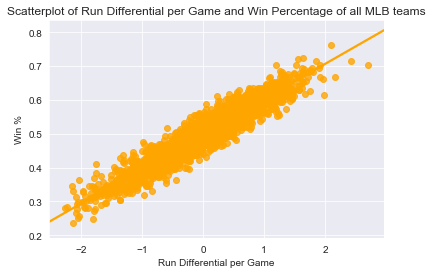

,RunDiff/G,WinPct
RunDiff/G,1.0000,0.9456
WinPct,0.9456,1.0000


In [13]:
# Plot of the Win Percentage and Run Differential for all MLB teams
sns.regplot(x="RunDiff/G", y="WinPct", data=teams, ci=None, color="orange")
plt.xlabel("Run Differential per Game")
plt.ylabel("Win %")
plt.title("Scatterplot of Run Differential per Game and Win Percentage of all MLB teams")
plt.show()
teams.loc[:, ["RunDiff/G", "WinPct"]].corr()

In [14]:
# Adding Pythagenpat Win Percentage (PythWinPct), a formula created by David Smyth and "U.S. Patriot",
# and Difference between Win Percentage and Pythagenpat Win Percentage (WinPctDiff) to teams and WC
# Formatted like this as I wanted to add this data to teams and WC, but avoid code duplication
teams["WinPctExp"] = ((teams["R"] + teams["RA"]) / teams["G"]) ** 0.287
teams["PythWinPct"] = ((teams["R"]) ** teams["WinPctExp"]) / (((teams["R"]) ** teams["WinPctExp"]) 
                                                              + (((teams["RA"]) ** teams["WinPctExp"])))
teams["WinPctDiff"] = teams["WinPct"] - teams["PythWinPct"]

WC = teams[teams["WSWin"] == "Y"].reset_index(drop=True)
WC.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID,WinPctExp,PythWinPct,WinPctDiff
0,1903,AL,BOS,BOS,NaN,1,141,70.0,91,47,NaN,NaN,Y,Y,708,4919,1336,222,113,48,261.0,559.0,141.0,NaN,36.0,NaN,504,358,2.57,123,20,4,3765,1142,23,269,579,239,86,0.959,Boston Americans,Huntington Avenue Grounds,379338.0,105,102,BOS,BOS,BOS,138,0.659420,204,1.446809,BOS1903,1.854127,0.652525,0.006895
1,1905,NL,NY1,SFG,NaN,1,155,76.0,105,48,NaN,NaN,Y,Y,780,5094,1392,191,88,39,517.0,497.0,291.0,NaN,90.0,NaN,505,364,2.39,117,18,15,4110,1160,25,364,760,258,93,0.960,New York Giants,Polo Grounds III,552700.0,102,98,NYG,NY1,NY1,153,0.686275,275,1.774194,SFG1905,1.834974,0.689488,-0.003214
2,1906,AL,CHA,CHW,NaN,1,154,79.0,93,58,NaN,NaN,Y,Y,570,4925,1133,152,52,7,453.0,492.0,216.0,NaN,50.0,NaN,460,326,2.13,117,32,4,4126,1212,11,255,543,243,80,0.963,Chicago White Sox,South Side Park II,585202.0,98,95,CHW,CHA,CHA,151,0.615894,110,0.714286,CHW1906,1.725305,0.591440,0.024454
3,1907,NL,CHN,CHC,NaN,1,155,76.0,107,45,NaN,NaN,Y,Y,574,4892,1224,162,48,13,435.0,449.0,235.0,NaN,48.0,NaN,390,264,1.73,114,32,8,4120,1054,11,402,586,211,110,0.967,Chicago Cubs,West Side Park II,422550.0,106,101,CHC,CHN,CHN,152,0.703947,184,1.187097,CHC1907,1.689682,0.657694,0.046254
4,1908,NL,CHN,CHC,NaN,1,158,78.0,99,55,NaN,NaN,Y,Y,624,5085,1267,196,56,19,418.0,520.0,212.0,NaN,40.0,NaN,461,341,2.14,108,29,12,4301,1137,20,437,668,205,76,0.969,Chicago Cubs,West Side Park II,665325.0,104,100,CHC,CHN,CHN,154,0.642857,163,1.031646,CHC1908,1.738416,0.628622,0.014235


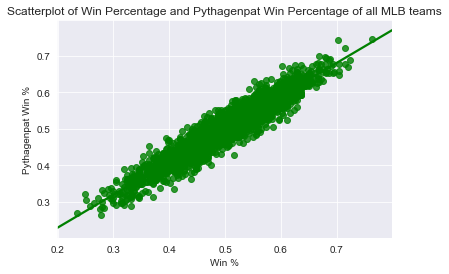

,WinPct,PythWinPct
WinPct,1.000000,0.949106
PythWinPct,0.949106,1.000000


In [15]:
# Plot of the Pythangenpat Win Percentage and Run Differential per Game for all MLB teams
sns.regplot(x="WinPct", y="PythWinPct", data=teams, ci=None, color="green")
plt.xlabel("Win %")
plt.ylabel("Pythagenpat Win %")
plt.title("Scatterplot of Win Percentage and Pythagenpat Win Percentage of all MLB teams")
plt.show()
teams.loc[:, ["WinPct", "PythWinPct"]].corr()

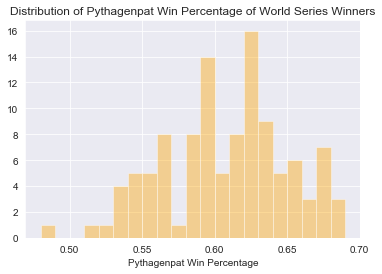

In [16]:
# Histogram of Pythagenpat Win Percentage of World Series Winners
sns.distplot(a = WC["PythWinPct"], bins = np.arange(.48, .7, .01), color = "orange", kde=False)
plt.xlabel("Pythagenpat Win Percentage")
plt.title("Distribution of Pythagenpat Win Percentage of World Series Winners")
plt.show()

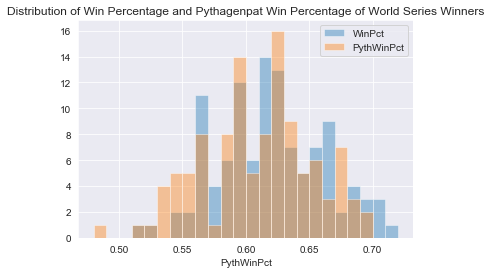

In [17]:
# Histogram of Win Percentage and Pythagenpat Win Percentage of World Series Winners
for dataset in (WC["WinPct"], WC["PythWinPct"]):
    sns.distplot(dataset, bins = np.arange(.48, .73, .01), kde=False)
plt.title("Distribution of Win Percentage and Pythagenpat Win Percentage of World Series Winners")
plt.legend(["WinPct", "PythWinPct"])
plt.show()

In [18]:
# Prints the five luckiest World Champions by WinPctDiff
WC.nlargest(5, "WinPctDiff").reset_index(drop=True)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID,WinPctExp,PythWinPct,WinPctDiff
0,1969,NL,NYN,NYM,E,1,162,82.0,100,62,Y,NaN,Y,Y,632,5427,1311,184,41,109,527.0,1089.0,66.0,43.0,NaN,NaN,541,488,2.99,51,28,35,4404,1217,119,517,1012,122,146,0.980,New York Mets,Shea Stadium,2175373.0,102,101,NYM,NYN,NYN,162,0.617284,91,0.561728,NYM1969,1.765053,0.568176,0.049108
1,2005,AL,CHA,CHW,C,1,162,81.0,99,63,Y,N,Y,Y,741,5529,1450,253,23,200,435.0,1002.0,137.0,67.0,79.0,49.0,645,592,3.61,9,10,54,4427,1392,167,459,1040,94,166,0.985,Chicago White Sox,U.S. Cellular Field,2342833.0,103,103,CHW,CHA,CHA,162,0.611111,96,0.592593,CHW2005,1.851634,0.563878,0.047233
2,1930,AL,PHA,OAK,NaN,1,154,76.0,102,52,NaN,NaN,Y,Y,951,5345,1573,319,74,125,599.0,531.0,48.0,33.0,NaN,NaN,751,652,4.28,72,8,21,4113,1457,84,488,672,145,121,0.976,Philadelphia Athletics,Shibe Park,721663.0,105,101,PHA,PHA,PHA,154,0.662338,200,1.298701,OAK1930,1.992815,0.615507,0.046831
3,1907,NL,CHN,CHC,NaN,1,155,76.0,107,45,NaN,NaN,Y,Y,574,4892,1224,162,48,13,435.0,449.0,235.0,NaN,48.0,NaN,390,264,1.73,114,32,8,4120,1054,11,402,586,211,110,0.967,Chicago Cubs,West Side Park II,422550.0,106,101,CHC,CHN,CHN,152,0.703947,184,1.187097,CHC1907,1.689682,0.657694,0.046254
4,1963,NL,LAN,LAD,NaN,1,163,81.0,99,63,NaN,NaN,Y,Y,640,5428,1361,178,34,110,453.0,867.0,124.0,70.0,NaN,NaN,550,465,2.85,51,24,29,4407,1329,111,402,1095,158,129,0.975,Los Angeles Dodgers,Dodger Stadium,2538602.0,93,91,LAD,LAN,LAN,162,0.611111,90,0.552147,LAD1963,1.769229,0.566633,0.044478


In [19]:
# Printing the five worst World Champions by Pythagenpat Win Percentage
SmallPyth = WC.nsmallest(5, "PythWinPct").reset_index(drop=True)
SmallPyth

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID,WinPctExp,PythWinPct,WinPctDiff
0,1987,AL,MIN,MIN,W,1,162,81.0,85,77,Y,NaN,Y,Y,786,5441,1422,258,35,196,523.0,898.0,113.0,65.0,38.0,39.0,806,734,4.63,16,4,39,4282,1465,210,564,990,98,147,0.984,Minnesota Twins,Hubert H Humphrey Metrodome,2081976.0,103,103,MIN,MIN,MIN,162,0.524691,-20,-0.123457,MIN1987,1.926757,0.487899,0.036792
1,2006,NL,SLN,STL,C,1,161,80.0,83,78,Y,N,Y,Y,781,5522,1484,292,27,184,531.0,922.0,59.0,32.0,61.0,40.0,762,721,4.54,6,9,38,4289,1475,193,504,970,98,170,0.984,St. Louis Cardinals,Busch Stadium III,3407104.0,99,99,STL,SLN,SLN,161,0.515528,19,0.118012,STL2006,1.912943,0.511776,0.003752
2,1959,NL,LAN,LAD,NaN,1,156,78.0,88,68,NaN,NaN,Y,Y,705,5282,1360,196,46,148,591.0,891.0,84.0,51.0,NaN,NaN,670,594,3.79,43,14,26,4233,1317,157,614,1077,114,154,0.981,Los Angeles Dodgers,Los Angeles Memorial Coliseum,2071045.0,107,107,LAD,LAN,LAN,156,0.564103,35,0.224359,LAD1959,1.867524,0.523756,0.040347
3,1985,AL,KCA,KCR,W,1,162,82.0,91,71,Y,NaN,Y,Y,687,5500,1384,261,49,154,473.0,840.0,128.0,48.0,36.0,41.0,639,566,3.49,27,11,41,4383,1433,103,463,846,127,160,0.980,Kansas City Royals,Royals Stadium,2162717.0,100,100,KCR,KCA,KCA,162,0.561728,48,0.296296,KCR1985,1.828265,0.533057,0.028671
4,2000,AL,NYA,NYY,E,1,161,80.0,87,74,Y,N,Y,Y,871,5556,1541,294,25,205,631.0,1007.0,99.0,48.0,57.0,50.0,814,753,4.76,9,6,40,4273,1458,177,577,1040,109,132,0.981,New York Yankees,Yankee Stadium II,3055435.0,99,98,NYY,NYA,NYA,161,0.540373,57,0.354037,NYY2000,1.961892,0.533147,0.007225


So the worst World Champion by Pythagorean Win Percentage is the 1987 Minnesota Twins, who had a negative Run Differential were expected to have a losing record (79.040 - 82.960).
Also, it makes sense that these teams are veering towards more recent MLB history, as as the playoff format expands, teams with worst records are able to make the playoffs, and hence have a shot at winning the World Series.

Interesting things: '06 Cardinals had two 8-game losing streaks and a 7-game losing streak.
                    '87 Twins went 29-52 on the road in regular season and 2-4 in postseason, including losing all
                    3 games in St. Louis in World Series. Also, only one other team finished above .500 in the AL
                    West and the Twins finished only 10 games above the last-placed Angels.
                    (Both from '06 Cardinals and '87 Twins Wikipedias)

## Determining what ranking each World Champion was in the MLB in terms of Pythagenpat Win Percentage

In [20]:
# This loop finds the ranking of each MLB team in a respective year by Pythagenpat Win Percentage
# and inserts this data into the "PythLeagueRank" col of teams
teams["PythLeagueRank"] = 0
teams["PythLeagueRankPct"] = 0
for year in years:
    yeardf = teams[teams["yearID"] == year] # Does not reset index as we will use the indices
    yeardf.sort_values(by = ["PythWinPct"], ascending=False, inplace=True) # Note there are no ties in any year
    yeardf.reset_index(inplace=True) # Not dropping the indices col as we will use them
    yeardf["PythLeagueRank"] = yeardf.index # The indices are now the rankings, 0-indexed
    yeardf["PythLeagueRank"] += 1
    
    # Inserting the ranks for a year into teams
    idxs = yeardf["index"].to_list()
    teams["PythLeagueRank"][idxs] = yeardf["PythLeagueRank"]
    teams["PythLeagueRankPct"][idxs] = yeardf["PythLeagueRank"] / len(yeardf)

WC = teams[teams["WSWin"] == "Y"].reset_index(drop=True)
WC.head()

/Users/michaelhymowitz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/michaelhymowitz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/michaelhymowitz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID,WinPctExp,PythWinPct,WinPctDiff,PythLeagueRank,PythLeagueRankPct
0,1903,AL,BOS,BOS,NaN,1,141,70.0,91,47,NaN,NaN,Y,Y,708,4919,1336,222,113,48,261.0,559.0,141.0,NaN,36.0,NaN,504,358,2.57,123,20,4,3765,1142,23,269,579,239,86,0.959,Boston Americans,Huntington Avenue Grounds,379338.0,105,102,BOS,BOS,BOS,138,0.659420,204,1.446809,BOS1903,1.854127,0.652525,0.006895,1,0.0625
1,1905,NL,NY1,SFG,NaN,1,155,76.0,105,48,NaN,NaN,Y,Y,780,5094,1392,191,88,39,517.0,497.0,291.0,NaN,90.0,NaN,505,364,2.39,117,18,15,4110,1160,25,364,760,258,93,0.960,New York Giants,Polo Grounds III,552700.0,102,98,NYG,NY1,NY1,153,0.686275,275,1.774194,SFG1905,1.834974,0.689488,-0.003214,1,0.0625
2,1906,AL,CHA,CHW,NaN,1,154,79.0,93,58,NaN,NaN,Y,Y,570,4925,1133,152,52,7,453.0,492.0,216.0,NaN,50.0,NaN,460,326,2.13,117,32,4,4126,1212,11,255,543,243,80,0.963,Chicago White Sox,South Side Park II,585202.0,98,95,CHW,CHA,CHA,151,0.615894,110,0.714286,CHW1906,1.725305,0.591440,0.024454,4,0.2500
3,1907,NL,CHN,CHC,NaN,1,155,76.0,107,45,NaN,NaN,Y,Y,574,4892,1224,162,48,13,435.0,449.0,235.0,NaN,48.0,NaN,390,264,1.73,114,32,8,4120,1054,11,402,586,211,110,0.967,Chicago Cubs,West Side Park II,422550.0,106,101,CHC,CHN,CHN,152,0.703947,184,1.187097,CHC1907,1.689682,0.657694,0.046254,1,0.0625
4,1908,NL,CHN,CHC,NaN,1,158,78.0,99,55,NaN,NaN,Y,Y,624,5085,1267,196,56,19,418.0,520.0,212.0,NaN,40.0,NaN,461,341,2.14,108,29,12,4301,1137,20,437,668,205,76,0.969,Chicago Cubs,West Side Park II,665325.0,104,100,CHC,CHN,CHN,154,0.642857,163,1.031646,CHC1908,1.738416,0.628622,0.014235,2,0.1250


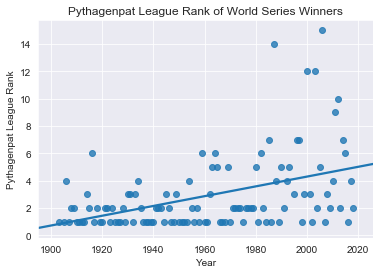

,yearID,PythLeagueRank
yearID,1.000000,0.432243
PythLeagueRank,0.432243,1.000000


In [21]:
# Plots the rank of World Series Winners
sns.regplot(x="yearID", y="PythLeagueRank", data=WC, ci=None)
plt.xlabel("Year")
plt.ylabel("Pythagenpat League Rank")
plt.title("Pythagenpat League Rank of World Series Winners")
plt.show()
WC.loc[:, ["yearID", "PythLeagueRank"]].corr()

Pre-Expanded Playoffs Info<br /> 
The 1916 Red Sox, who by Pythagenpat Win Percentage should have had a 87.085-68.915 (-3.915 wins) record. The White Sox' Pythagenpat record should be 90.296 - 64.704 (+1.296 wins)<br />
The 1959 Dodgers were the 3rd best team in the NL. They're Pythagenpat Win Percentage was 0.524, while the Braves' was 0.569 and the Giants were 0.564. The Dodgers beat the Braves in a best-of-3 tiebreak for the NL pennant<br />
The 1964 Cardinals Pythagenpat Win Percentage was 0.542, while the Reds' was 0.568

In [22]:
# Prints the five highest Pythagenpat League Rank of World Champions
WC.nlargest(5, "PythLeagueRank").reset_index(drop=True)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID,WinPctExp,PythWinPct,WinPctDiff,PythLeagueRank,PythLeagueRankPct
0,2006,NL,SLN,STL,C,1,161,80.0,83,78,Y,N,Y,Y,781,5522,1484,292,27,184,531.0,922.0,59.0,32.0,61.0,40.0,762,721,4.54,6,9,38,4289,1475,193,504,970,98,170,0.984,St. Louis Cardinals,Busch Stadium III,3407104.0,99,99,STL,SLN,SLN,161,0.515528,19,0.118012,STL2006,1.912943,0.511776,0.003752,15,0.500000
1,1987,AL,MIN,MIN,W,1,162,81.0,85,77,Y,NaN,Y,Y,786,5441,1422,258,35,196,523.0,898.0,113.0,65.0,38.0,39.0,806,734,4.63,16,4,39,4282,1465,210,564,990,98,147,0.984,Minnesota Twins,Hubert H Humphrey Metrodome,2081976.0,103,103,MIN,MIN,MIN,162,0.524691,-20,-0.123457,MIN1987,1.926757,0.487899,0.036792,14,0.538462
2,2000,AL,NYA,NYY,E,1,161,80.0,87,74,Y,N,Y,Y,871,5556,1541,294,25,205,631.0,1007.0,99.0,48.0,57.0,50.0,814,753,4.76,9,6,40,4273,1458,177,577,1040,109,132,0.981,New York Yankees,Yankee Stadium II,3055435.0,99,98,NYY,NYA,NYA,161,0.540373,57,0.354037,NYY2000,1.961892,0.533147,0.007225,12,0.400000
3,2003,NL,FLO,FLA,E,2,162,81.0,91,71,N,Y,Y,Y,751,5490,1459,292,44,157,515.0,978.0,150.0,74.0,57.0,41.0,692,648,4.04,7,11,36,4336,1415,128,530,1132,78,162,0.987,Florida Marlins,Pro Player Stadium,1303215.0,98,98,FLA,FLO,FLO,162,0.561728,59,0.364198,FLA2003,1.873176,0.538241,0.023488,12,0.400000
4,2012,NL,SFN,SFG,W,1,162,81.0,94,68,Y,N,Y,Y,718,5558,1495,287,57,103,483.0,1097.0,118.0,39.0,29.0,61.0,649,593,3.68,5,14,53,4353,1361,142,489,1237,115,134,0.981,San Francisco Giants,AT&T Park,3377371.0,88,88,SFG,SFN,SFN,162,0.580247,69,0.425926,SFG2012,1.844314,0.546452,0.033795,10,0.333333


Unsurprisingly, the '06 Cardinals and the '87 Twins, the World Champions with the worst Pythagenpat League Percentages, are the two lowest ranking World Champions relative to their league.

# Finding the Strength of each World Champions' schedule

In [23]:
# This for loop calculates each World Champions' strength of schedule by WinPct, appending to WC_SoS_dict
WC_SoS_dict = dict()
for year in years:
    # Reading in the gamelog of a year and filtering it to only include the schedule of the World Champion
    gamelog = pd.read_csv("gl" + str(year) + ".TXT", header=None)
    gamelog = gamelog.iloc[:, [3, 6]].reset_index(drop=True)
    gamelog.rename(columns = {3: "A", 6: "H"}, inplace=True) # Not necessary, but useful if need to print
    gamelog = gamelog[(gamelog.A == YearsWCRetro[year]) | (gamelog.H == YearsWCRetro[year])].reset_index(drop=True)
    
    # Making a list of the World Champions' gamelog
    WC_home_log = gamelog[gamelog.H == YearsWCRetro[year]]
    WC_away_log = gamelog[gamelog.A == YearsWCRetro[year]]
    WC_home_opps = WC_home_log["A"].tolist()
    WC_away_opps = WC_away_log["H"].tolist()
    WC_Opps = WC_home_opps + WC_away_opps
    
    # Creating a dictionary mapping all teams to their PythWinPct
    yearly_teams = teams[teams["yearID"] == year].reset_index(drop=True)
    yearly_teams.set_index("teamIDretro", inplace=True)
    yearly_teams = yearly_teams["PythWinPct"]
    yearly_WinPct = yearly_teams.to_dict()
    
    # Calculating strength of schedule
    SoS = 0.0
    for team in WC_Opps:
        SoS += yearly_WinPct[team]
    SoS = SoS / len(WC_Opps)
    WC_SoS_dict[year] = SoS

WC_SoS_dict

{1903: 0.47409264003080953,
 1905: 0.475243250190313,
 1906: 0.49030236513255676,
 1907: 0.47843033068730056,
 1908: 0.47969319358597434,
 1909: 0.47686167800970686,
 1910: 0.4740221104280013,
 1911: 0.47466826531705203,
 1912: 0.47781955040789204,
 1913: 0.4795084942745672,
 1914: 0.4874779725284909,
 1915: 0.48444249266499934,
 1916: 0.49541779492721644,
 1917: 0.4817930239124405,
 1918: 0.4867089656170615,
 1919: 0.4812867887749154,
 1920: 0.479795831700226,
 1921: 0.48292602403916723,
 1922: 0.48178259361932846,
 1923: 0.4791955667814123,
 1924: 0.4876134622857002,
 1925: 0.48355672900759245,
 1926: 0.4890058877384121,
 1927: 0.4662608466217146,
 1928: 0.480104387959159,
 1929: 0.47189291991837223,
 1930: 0.4798661299927962,
 1931: 0.47900241835188895,
 1932: 0.47500029795360693,
 1933: 0.48952073672977836,
 1934: 0.486788434080411,
 1935: 0.481642982135609,
 1936: 0.4753558532830723,
 1937: 0.4742048680537547,
 1938: 0.47811534645374504,
 1939: 0.4675075925350781,
 1940: 0.4826019

In [24]:
# Adding strength of schedule to WC
WC["SoS"] = WC["yearID"]
WC["SoS"].replace(WC_SoS_dict, inplace=True)
WC

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID,WinPctExp,PythWinPct,WinPctDiff,PythLeagueRank,PythLeagueRankPct,SoS
0,1903,AL,BOS,BOS,NaN,1,141,70.0,91,47,NaN,NaN,Y,Y,708,4919,1336,222,113,48,261.0,559.0,141.0,NaN,36.0,NaN,504,358,2.57,123,20,4,3765,1142,23,269,579,239,86,0.959,Boston Americans,Huntington Avenue Grounds,379338.0,105,102,BOS,BOS,BOS,138,0.659420,204,1.446809,BOS1903,1.854127,0.652525,0.006895,1,0.062500,0.474093
1,1905,NL,NY1,SFG,NaN,1,155,76.0,105,48,NaN,NaN,Y,Y,780,5094,1392,191,88,39,517.0,497.0,291.0,NaN,90.0,NaN,505,364,2.39,117,18,15,4110,1160,25,364,760,258,93,0.960,New York Giants,Polo Grounds III,552700.0,102,98,NYG,NY1,NY1,153,0.686275,275,1.774194,SFG1905,1.834974,0.689488,-0.003214,1,0.062500,0.475243
2,1906,AL,CHA,CHW,NaN,1,154,79.0,93,58,NaN,NaN,Y,Y,570,4925,1133,152,52,7,453.0,492.0,216.0,NaN,50.0,NaN,460,326,2.13,117,32,4,4126,1212,11,255,543,243,80,0.963,Chicago White Sox,South Side Park II,585202.0,98,95,CHW,CHA,CHA,151,0.615894,110,0.714286,CHW1906,1.725305,0.591440,0.024454,4,0.250000,0.490302
3,1907,NL,CHN,CHC,NaN,1,155,76.0,107,45,NaN,NaN,Y,Y,574,4892,1224,162,48,13,435.0,449.0,235.0,NaN,48.0,NaN,390,264,1.73,114,32,8,4120,1054,11,402,586,211,110,0.967,Chicago Cubs,West Side Park II,422550.0,106,101,CHC,CHN,CHN,152,0.703947,184,1.187097,CHC1907,1.689682,0.657694,0.046254,1,0.062500,0.478430
4,1908,NL,CHN,CHC,NaN,1,158,78.0,99,55,NaN,NaN,Y,Y,624,5085,1267,196,56,19,418.0,520.0,212.0,NaN,40.0,NaN,461,341,2.14,108,29,12,4301,1137,20,437,668,205,76,0.969,Chicago Cubs,West Side Park II,665325.0,104,100,CHC,CHN,CHN,154,0.642857,163,1.031646,CHC1908,1.738416,0.628622,0.014235,2,0.125000,0.479693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2014,NL,SFN,SFG,W,2,162,81.0,88,74,N,Y,Y,Y,665,5523,1407,257,42,132,427.0,1245.0,56.0,27.0,43.0,49.0,614,564,3.50,8,12,46,4347,1305,133,389,1211,100,155,0.984,San Francisco Giants,AT&T Park,3368697.0,95,95,SFG,SFN,SFN,162,0.543210,51,0.314815,SFG2014,1.809427,0.536032,0.007178,7,0.233333,0.490797
110,2015,AL,KCA,KCR,C,1,162,81.0,95,67,Y,N,Y,Y,724,5575,1497,300,42,139,383.0,973.0,104.0,34.0,77.0,47.0,641,601,3.73,2,8,56,4356,1372,155,489,1160,88,138,0.985,Kansas City Royals,Kauffman Stadium,2708549.0,104,103,KCR,KCA,KCA,162,0.586420,83,0.512346,KCR2015,1.843539,0.555884,0.030536,6,0.200000,0.497863
111,2016,NL,CHN,CHC,C,1,162,81.0,103,58,Y,N,Y,Y,808,5503,1409,293,30,199,656.0,1339.0,66.0,34.0,96.0,37.0,556,511,3.15,5,15,38,4379,1125,163,495,1441,101,116,0.983,Chicago Cubs,Wrigley Field,3232420.0,95,93,CHC,CHN,CHN,161,0.639752,252,1.555556,CHC2016,1.843151,0.665735,-0.025984,1,0.033333,0.484062
112,2017,AL,HOU,HOU,W,1,162,81.0,101,61,Y,N,Y,Y,896,5611,1581,346,20,238,509.0,1087.0,98.0,42.0,70.0,61.0,700,662,4.12,1,9,45,4338,1314,192,522,1593,99,153,0.983,Houston Astros,Minute Maid Park,2403671.0,91,90,HOU,HOU,HOU,162,0.623457,196,1.209877,HOU2017,1.928145,0.616799,0.006658,4,0.133333,0.491964


In [25]:
# Prints the teams data of the 5 World Champions with easiest schedule
WC_SoS = pd.DataFrame(list(WC_SoS_dict.items()), columns=["yearID", "SoS"])
easy = WC_SoS.nsmallest(5, "SoS").reset_index(drop=True)
easy_years = easy["yearID"].to_list()
WC[WC["yearID"].isin(easy_years)].sort_values("SoS").reset_index(drop=True)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID,WinPctExp,PythWinPct,WinPctDiff,PythLeagueRank,PythLeagueRankPct,SoS
0,1927,AL,NYA,NYY,NaN,1,155,77.0,110,44,NaN,NaN,Y,Y,975,5347,1644,291,103,158,635.0,605.0,90.0,64.0,NaN,NaN,599,494,3.20,82,11,20,4167,1403,42,409,431,196,123,0.969,New York Yankees,Yankee Stadium I,1164015.0,98,94,NYY,NYA,NYA,154,0.714286,376,2.425806,NYY1927,1.944980,0.720622,-0.006336,1,0.0625,0.466261
1,1939,AL,NYA,NYY,NaN,1,152,77.0,106,45,NaN,NaN,Y,Y,967,5300,1521,259,55,166,701.0,543.0,72.0,37.0,NaN,NaN,556,496,3.31,87,15,26,4044,1208,85,567,565,126,159,0.978,New York Yankees,Yankee Stadium I,859785.0,99,95,NYY,NYA,NYA,151,0.701987,411,2.703947,NYY1939,1.937518,0.745030,-0.043044,1,0.0625,0.467508
2,1942,NL,SLN,STL,NaN,1,156,78.0,106,48,NaN,NaN,Y,Y,755,5421,1454,282,69,60,551.0,507.0,71.0,NaN,NaN,NaN,482,399,2.55,70,18,15,4230,1192,49,473,651,169,137,0.972,St. Louis Cardinals,Sportsman's Park IV,553552.0,108,104,STL,SLN,SLN,154,0.688312,273,1.750000,STL1942,1.811688,0.692756,-0.004445,2,0.1250,0.468333
3,1929,AL,PHA,OAK,NaN,1,151,74.0,104,46,NaN,NaN,Y,Y,901,5204,1539,288,76,122,543.0,440.0,61.0,38.0,NaN,NaN,615,519,3.44,70,9,24,4071,1371,73,487,573,148,117,0.975,Philadelphia Athletics,Shibe Park,839176.0,104,100,PHA,PHA,PHA,150,0.693333,286,1.894040,OAK1929,1.938627,0.677068,0.016266,1,0.0625,0.471893
4,1948,AL,CLE,CLE,NaN,1,156,79.0,97,58,NaN,NaN,Y,Y,840,5446,1534,242,54,155,646.0,575.0,54.0,44.0,NaN,NaN,568,504,3.22,66,26,30,4227,1246,82,628,595,114,183,0.982,Cleveland Indians,Cleveland Stadium,2620627.0,97,95,CLE,CLE,CLE,155,0.625806,272,1.743590,CLE1948,1.880279,0.676058,-0.050252,1,0.0625,0.472574


Note: '06 Cardinals have easiest opponents post-1953.

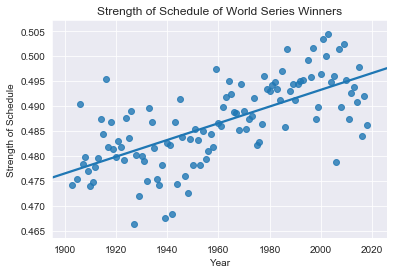

,yearID,SoS
yearID,1.000000,0.672077
SoS,0.672077,1.000000


In [26]:
# Plot of the strength of schedule of World Series winners
sns.regplot(x="yearID", y="SoS", data=WC_SoS, ci=None)
plt.xlabel("Year")
plt.ylabel("Strength of Schedule")
plt.title("Strength of Schedule of World Series Winners")
plt.show()
WC_SoS.loc[:, ["yearID", "SoS"]].corr()

The stength of schedule of World Champions has noticeably increased over time.

# Boundary Win Percentage of Each World Champion

In [27]:
# Calculating how strong each World Champion team was surrounding their win
# Note no team won a World Series in their first 3 years of existence, so we do not have to condition on that
# (there may be an error in this code if that was the case)
boundary_winpct = dict()
for year in years:
    boundary_wins = 0
    boundary_games = 0
    boundary_win_pct = 0.0
    if year - 2 in years:
        boundary_wins += int(teams[(teams["franchID"] == YearsWCFranch[year]) & (teams["yearID"] == year - 2)]["W"])
        boundary_games += int(teams[(teams["franchID"] == YearsWCFranch[year]) & (teams["yearID"] == year - 2)]["G/T"])
    if year - 1 in years:
        boundary_wins += 3*int(teams[(teams["franchID"] == YearsWCFranch[year]) & (teams["yearID"] == year - 1)]["W"])
        boundary_games += 3*int(teams[(teams["franchID"] == YearsWCFranch[year]) & (teams["yearID"] == year - 1)]["G/T"])
    if year + 1 in years:
        boundary_wins += 3*int(teams[(teams["franchID"] == YearsWCFranch[year]) & (teams["yearID"] == year + 1)]["W"])
        boundary_games += 3*int(teams[(teams["franchID"] == YearsWCFranch[year]) & (teams["yearID"] == year + 1)]["G/T"])
    if year + 2 in years:
        boundary_wins += int(teams[(teams["franchID"] == YearsWCFranch[year]) & (teams["yearID"] == year + 2)]["W"])
        boundary_games += int(teams[(teams["franchID"] == YearsWCFranch[year]) & (teams["yearID"] == year + 2)]["G/T"])
    boundary_win_pct = boundary_wins / boundary_games
    boundary_winpct[year] = boundary_win_pct

boundary_winpct

{1903: 0.5131578947368421,
 1905: 0.606951871657754,
 1906: 0.589066918001885,
 1907: 0.6870915032679739,
 1908: 0.6986076986076986,
 1909: 0.5923515052888527,
 1910: 0.6129827444535744,
 1911: 0.6328382838283828,
 1912: 0.5292181069958848,
 1913: 0.5851851851851851,
 1914: 0.4917627677100494,
 1915: 0.5846279640228945,
 1916: 0.6220538720538721,
 1917: 0.5487588652482269,
 1918: 0.5374787052810903,
 1919: 0.52,
 1920: 0.5905172413793104,
 1921: 0.590797041906327,
 1922: 0.6089795918367347,
 1923: 0.5844897959183674,
 1924: 0.5452302631578947,
 1925: 0.5734094616639478,
 1926: 0.5440456769983687,
 1927: 0.5949675324675324,
 1928: 0.6258116883116883,
 1929: 0.6503667481662592,
 1930: 0.6801319043693322,
 1931: 0.5305126118795769,
 1932: 0.6039441248972884,
 1933: 0.5489396411092985,
 1934: 0.563873067534581,
 1935: 0.5811688311688312,
 1936: 0.6304526748971193,
 1937: 0.6567901234567901,
 1938: 0.6661211129296236,
 1939: 0.6231647634584013,
 1940: 0.5815660685154975,
 1941: 0.6322213181

In [28]:
# Adding Boundary Win Percentage to WC
WC["BoundaryWinPct"] = WC["yearID"]
WC["BoundaryWinPct"].replace(boundary_winpct, inplace=True)
WC.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID,WinPctExp,PythWinPct,WinPctDiff,PythLeagueRank,PythLeagueRankPct,SoS,BoundaryWinPct
0,1903,AL,BOS,BOS,NaN,1,141,70.0,91,47,NaN,NaN,Y,Y,708,4919,1336,222,113,48,261.0,559.0,141.0,NaN,36.0,NaN,504,358,2.57,123,20,4,3765,1142,23,269,579,239,86,0.959,Boston Americans,Huntington Avenue Grounds,379338.0,105,102,BOS,BOS,BOS,138,0.659420,204,1.446809,BOS1903,1.854127,0.652525,0.006895,1,0.0625,0.474093,0.513158
1,1905,NL,NY1,SFG,NaN,1,155,76.0,105,48,NaN,NaN,Y,Y,780,5094,1392,191,88,39,517.0,497.0,291.0,NaN,90.0,NaN,505,364,2.39,117,18,15,4110,1160,25,364,760,258,93,0.960,New York Giants,Polo Grounds III,552700.0,102,98,NYG,NY1,NY1,153,0.686275,275,1.774194,SFG1905,1.834974,0.689488,-0.003214,1,0.0625,0.475243,0.606952
2,1906,AL,CHA,CHW,NaN,1,154,79.0,93,58,NaN,NaN,Y,Y,570,4925,1133,152,52,7,453.0,492.0,216.0,NaN,50.0,NaN,460,326,2.13,117,32,4,4126,1212,11,255,543,243,80,0.963,Chicago White Sox,South Side Park II,585202.0,98,95,CHW,CHA,CHA,151,0.615894,110,0.714286,CHW1906,1.725305,0.591440,0.024454,4,0.2500,0.490302,0.589067
3,1907,NL,CHN,CHC,NaN,1,155,76.0,107,45,NaN,NaN,Y,Y,574,4892,1224,162,48,13,435.0,449.0,235.0,NaN,48.0,NaN,390,264,1.73,114,32,8,4120,1054,11,402,586,211,110,0.967,Chicago Cubs,West Side Park II,422550.0,106,101,CHC,CHN,CHN,152,0.703947,184,1.187097,CHC1907,1.689682,0.657694,0.046254,1,0.0625,0.478430,0.687092
4,1908,NL,CHN,CHC,NaN,1,158,78.0,99,55,NaN,NaN,Y,Y,624,5085,1267,196,56,19,418.0,520.0,212.0,NaN,40.0,NaN,461,341,2.14,108,29,12,4301,1137,20,437,668,205,76,0.969,Chicago Cubs,West Side Park II,665325.0,104,100,CHC,CHN,CHN,154,0.642857,163,1.031646,CHC1908,1.738416,0.628622,0.014235,2,0.1250,0.479693,0.698608


In [29]:
# Prints the teams data of the 5 World Champions with worst boundary win percentage
WC_boundary = pd.DataFrame(list(boundary_winpct.items()), columns=["yearID", "BoundaryWinPct"])
worst = WC_boundary.nsmallest(5, "BoundaryWinPct").reset_index(drop=True)
worst_years = worst["yearID"].to_list()
BoundarySmall = WC[WC["yearID"].isin(worst_years)].sort_values("BoundaryWinPct").reset_index(drop=True)
BoundarySmall

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID,WinPctExp,PythWinPct,WinPctDiff,PythLeagueRank,PythLeagueRankPct,SoS,BoundaryWinPct
0,1997,NL,FLO,FLA,E,2,162,81.0,92,70,N,Y,Y,Y,740,5439,1410,272,28,136,686.0,1074.0,115.0,58.0,61.0,42.0,669,615,3.83,12,10,39,4340,1353,131,639,1188,116,167,0.981,Florida Marlins,Joe Robbie Stadium,2364387.0,95,96,FLA,FLO,FLO,162,0.567901,71,0.438272,FLA1997,1.860401,0.546776,0.021126,7,0.250000,0.501703,0.417384
1,2013,AL,BOS,BOS,E,1,162,81.0,97,65,Y,N,Y,Y,853,5651,1566,363,29,178,581.0,1308.0,123.0,19.0,72.0,50.0,656,613,3.79,5,8,33,4362,1366,156,524,1294,80,142,0.987,Boston Red Sox,Fenway Park II,2833333.0,102,102,BOS,BOS,BOS,162,0.598765,197,1.216049,BOS2013,1.897374,0.622048,-0.023282,2,0.066667,0.493837,0.453704
2,1988,NL,LAN,LAD,W,1,162,81.0,94,67,Y,NaN,Y,Y,628,5431,1346,217,25,99,437.0,947.0,131.0,46.0,32.0,50.0,544,482,2.96,32,24,49,4390,1291,84,473,1029,142,126,0.977,Los Angeles Dodgers,Dodger Stadium,2980262.0,98,97,LAD,LAN,LAN,161,0.583851,84,0.518519,LAD1988,1.764621,0.563009,0.020842,4,0.153846,0.492911,0.472093
3,1969,NL,NYN,NYM,E,1,162,82.0,100,62,Y,NaN,Y,Y,632,5427,1311,184,41,109,527.0,1089.0,66.0,43.0,NaN,NaN,541,488,2.99,51,28,35,4404,1217,119,517,1012,122,146,0.980,New York Mets,Shea Stadium,2175373.0,102,101,NYM,NYN,NYN,162,0.617284,91,0.561728,NYM1969,1.765053,0.568176,0.049108,5,0.208333,0.494406,0.472222
4,1990,NL,CIN,CIN,W,1,162,81.0,91,71,Y,NaN,Y,Y,693,5525,1466,284,40,125,466.0,913.0,166.0,66.0,42.0,42.0,597,549,3.39,14,12,50,4369,1338,124,543,1029,102,126,0.983,Cincinnati Reds,Riverfront Stadium,2400892.0,105,105,CIN,CIN,CIN,162,0.561728,96,0.592593,CIN1990,1.813880,0.567209,-0.005481,5,0.192308,0.491239,0.481853


So the Marlins were the worst team in the years surrounding it's World Series victory, but this seems excusable as the club was established in 1993. Note: '87 Twins are 10th.

# BABIP

### BABIP - Batters

In [30]:
# bt has all batters' single-season stats for years 1970- and with 100+ ABs
# 1970 is when Lahman database starts including SF for all batters and pitchers
bt = pd.read_csv("Batting.csv")
bt = bt[bt["yearID"] >= 1970].reset_index(drop=True)
bt = bt[bt["AB"] >= 100]
bt

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aaronha01,1970,1,ATL,NL,150,516,103,154,26,1,38,118.0,9.0,0.0,74,63.0,15.0,2.0,0.0,6.0,13.0
7,ageeto01,1970,1,NYN,NL,153,636,107,182,30,7,24,75.0,31.0,15.0,55,156.0,3.0,2.0,1.0,2.0,11.0
10,alcarlu01,1970,1,KCA,AL,35,120,10,20,5,1,1,14.0,0.0,0.0,4,13.0,0.0,0.0,1.0,1.0,2.0
11,allenbe01,1970,1,WS2,AL,104,261,31,61,7,1,8,29.0,0.0,2.0,43,21.0,4.0,0.0,1.0,0.0,4.0
12,allendi01,1970,1,SLN,NL,122,459,88,128,17,5,34,101.0,5.0,4.0,71,118.0,16.0,2.0,0.0,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57665,younger03,2018,1,LAA,AL,41,109,12,22,4,2,1,8.0,5.0,1.0,6,28.0,0.0,1.0,0.0,1.0,4.0
57672,zimmebr01,2018,1,CLE,AL,34,106,14,24,5,0,2,9.0,4.0,1.0,7,44.0,0.0,1.0,0.0,0.0,1.0
57674,zimmery01,2018,1,WAS,NL,85,288,33,76,21,2,13,51.0,1.0,1.0,30,55.0,1.0,3.0,0.0,2.0,10.0
57675,zobribe01,2018,1,CHN,NL,139,455,67,139,28,3,9,58.0,3.0,4.0,55,60.0,1.0,2.0,1.0,7.0,8.0


In [31]:
# Adding franchID to bt
bt["franchID"] = bt["teamID"]
bt["franchID"] = bt.franchID.map(team_to_franch)
bt.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,franchID
0,aaronha01,1970,1,ATL,NL,150,516,103,154,26,1,38,118.0,9.0,0.0,74,63.0,15.0,2.0,0.0,6.0,13.0,ATL
7,ageeto01,1970,1,NYN,NL,153,636,107,182,30,7,24,75.0,31.0,15.0,55,156.0,3.0,2.0,1.0,2.0,11.0,NYM
10,alcarlu01,1970,1,KCA,AL,35,120,10,20,5,1,1,14.0,0.0,0.0,4,13.0,0.0,0.0,1.0,1.0,2.0,KCR
11,allenbe01,1970,1,WS2,AL,104,261,31,61,7,1,8,29.0,0.0,2.0,43,21.0,4.0,0.0,1.0,0.0,4.0,TEX
12,allendi01,1970,1,SLN,NL,122,459,88,128,17,5,34,101.0,5.0,4.0,71,118.0,16.0,2.0,0.0,1.0,9.0,STL


In [32]:
# Adding TeamYearID to bt to identify World Champions
bt["TeamYearID"] = bt["franchID"] + bt["yearID"].astype(str)
bt.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,franchID,TeamYearID
0,aaronha01,1970,1,ATL,NL,150,516,103,154,26,1,38,118.0,9.0,0.0,74,63.0,15.0,2.0,0.0,6.0,13.0,ATL,ATL1970
7,ageeto01,1970,1,NYN,NL,153,636,107,182,30,7,24,75.0,31.0,15.0,55,156.0,3.0,2.0,1.0,2.0,11.0,NYM,NYM1970
10,alcarlu01,1970,1,KCA,AL,35,120,10,20,5,1,1,14.0,0.0,0.0,4,13.0,0.0,0.0,1.0,1.0,2.0,KCR,KCR1970
11,allenbe01,1970,1,WS2,AL,104,261,31,61,7,1,8,29.0,0.0,2.0,43,21.0,4.0,0.0,1.0,0.0,4.0,TEX,TEX1970
12,allendi01,1970,1,SLN,NL,122,459,88,128,17,5,34,101.0,5.0,4.0,71,118.0,16.0,2.0,0.0,1.0,9.0,STL,STL1970


In [33]:
# Adding BABIP to bt
bt["BABIP"] = (bt["H"] - bt["HR"]) / (bt["AB"] - bt["HR"] - bt["SO"] + bt["SF"])
bt.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,franchID,TeamYearID,BABIP
0,aaronha01,1970,1,ATL,NL,150,516,103,154,26,1,38,118.0,9.0,0.0,74,63.0,15.0,2.0,0.0,6.0,13.0,ATL,ATL1970,0.275534
7,ageeto01,1970,1,NYN,NL,153,636,107,182,30,7,24,75.0,31.0,15.0,55,156.0,3.0,2.0,1.0,2.0,11.0,NYM,NYM1970,0.344978
10,alcarlu01,1970,1,KCA,AL,35,120,10,20,5,1,1,14.0,0.0,0.0,4,13.0,0.0,0.0,1.0,1.0,2.0,KCR,KCR1970,0.177570
11,allenbe01,1970,1,WS2,AL,104,261,31,61,7,1,8,29.0,0.0,2.0,43,21.0,4.0,0.0,1.0,0.0,4.0,TEX,TEX1970,0.228448
12,allendi01,1970,1,SLN,NL,122,459,88,128,17,5,34,101.0,5.0,4.0,71,118.0,16.0,2.0,0.0,1.0,9.0,STL,STL1970,0.305195


In [34]:
# bt_careers has the career stats of all batters, only counting stats from 1970-
bt_careers = bt.groupby(["playerID"]).sum()
bt_careers.drop(columns = ["yearID", "stint"], inplace=True)
bt_careers["BABIP"] = (bt_careers["H"] - bt_careers["HR"]) / (bt_careers["AB"] - bt_careers["HR"]
                                                              - bt_careers["SO"] + bt_careers["SF"])
bt_careers["BABIP"].replace({np.NaN: 0}, inplace=True)
bt_careers.head()

,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BABIP
playerID,,,,,,,,,,,,,,,,,,
aaronha01,872,2928,471,815,110,7,201,573.0,16.0,4.0,449,345.0,74.0,7.0,2.0,27.0,75.0,0.254878
abbotje01,169,459,64,127,29,2,15,70.0,5.0,4.0,30,66.0,2.0,2.0,4.0,6.0,4.0,0.291667
abbotku01,634,1903,253,488,102,23,56,218.0,19.0,11.0,128,529.0,11.0,16.0,18.0,10.0,32.0,0.325301
abercre01,111,255,39,54,12,2,5,24.0,6.0,5.0,18,78.0,2.0,3.0,4.0,1.0,2.0,0.283237
abernbr01,196,767,89,194,35,5,7,73.0,18.0,7.0,52,81.0,1.0,6.0,11.0,3.0,11.0,0.274194


In [35]:
# BABIP_bts maps playerID to their career BABIP
BABIP_bts = bt_careers.to_dict()["BABIP"]
BABIP_bts

{'aaronha01': 0.2548775425487754,
 'abbotje01': 0.2916666666666667,
 'abbotku01': 0.3253012048192771,
 'abercre01': 0.2832369942196532,
 'abernbr01': 0.27419354838709675,
 'abnersh01': 0.26758147512864494,
 'abreubo01': 0.33948108783994996,
 'abreujo02': 0.32856483617904936,
 'abreuto01': 0.3065326633165829,
 'ackledu01': 0.2828154724159797,
 'acunaro01': 0.3519163763066202,
 'adamecr01': 0.26704545454545453,
 'adamewi01': 0.3783783783783784,
 'adamsda02': 0.2631578947368421,
 'adamsgl01': 0.2930194805194805,
 'adamsla01': 0.36764705882352944,
 'adamsma01': 0.30751708428246016,
 'adamsri02': 0.2422680412371134,
 'adamsru01': 0.2634069400630915,
 'adducji02': 0.29411764705882354,
 'adriaeh01': 0.2898550724637681,
 'agbaybe01': 0.31994818652849744,
 'ageeto01': 0.3111467522052927,
 'aguaylu01': 0.25971370143149286,
 'aguilje01': 0.3185483870967742,
 'ahmedni01': 0.2646239554317549,
 'aikenwi01': 0.28890069038767924,
 'aingeda01': 0.26765799256505574,
 'albieoz01': 0.2930780559646539,
 'a

In [36]:
# btWC only has batters' stats of years they were on a World Champion team
btWC = bt[bt["TeamYearID"].isin(WCIDs)].reset_index(drop=True)
btWC.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,franchID,TeamYearID,BABIP
0,belanma01,1970,1,BAL,AL,145,459,53,100,6,5,1,36.0,13.0,2.0,52,65.0,3.0,5.0,9.0,2.0,4.0,BAL,BAL1970,0.250633
1,blairpa01,1970,1,BAL,AL,133,480,79,128,24,2,18,65.0,24.0,11.0,56,93.0,1.0,3.0,5.0,4.0,9.0,BAL,BAL1970,0.294906
2,bufordo01,1970,1,BAL,AL,144,504,99,137,15,2,17,66.0,16.0,8.0,109,55.0,8.0,8.0,3.0,5.0,1.0,BAL,BAL1970,0.274600
3,crowlte01,1970,1,BAL,AL,83,152,25,39,5,0,5,20.0,2.0,0.0,35,26.0,3.0,0.0,2.0,1.0,5.0,BAL,BAL1970,0.278689
4,cuellmi01,1970,1,BAL,AL,41,112,6,10,1,0,2,7.0,0.0,0.0,2,48.0,0.0,0.0,9.0,0.0,0.0,BAL,BAL1970,0.129032


In [37]:
# Adding careerBABIPs to btWC
btWC["careerBABIP"] = btWC["playerID"]
btWC.replace({"careerBABIP": BABIP_bts}, inplace=True)
btWC

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,franchID,TeamYearID,BABIP,careerBABIP
0,belanma01,1970,1,BAL,AL,145,459,53,100,6,5,1,36.0,13.0,2.0,52,65.0,3.0,5.0,9.0,2.0,4.0,BAL,BAL1970,0.250633,0.255022
1,blairpa01,1970,1,BAL,AL,133,480,79,128,24,2,18,65.0,24.0,11.0,56,93.0,1.0,3.0,5.0,4.0,9.0,BAL,BAL1970,0.294906,0.266178
2,bufordo01,1970,1,BAL,AL,144,504,99,137,15,2,17,66.0,16.0,8.0,109,55.0,8.0,8.0,3.0,5.0,1.0,BAL,BAL1970,0.274600,0.274823
3,crowlte01,1970,1,BAL,AL,83,152,25,39,5,0,5,20.0,2.0,0.0,35,26.0,3.0,0.0,2.0,1.0,5.0,BAL,BAL1970,0.278689,0.246032
4,cuellmi01,1970,1,BAL,AL,41,112,6,10,1,0,2,7.0,0.0,0.0,2,48.0,0.0,0.0,9.0,0.0,0.0,BAL,BAL1970,0.129032,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,nunezed02,2018,1,BOS,AL,127,480,56,127,23,3,10,44.0,7.0,2.0,16,69.0,0.0,2.0,1.0,3.0,17.0,BOS,BOS2018,0.289604,0.304739
661,pearcst01,2018,2,BOS,AL,50,136,19,38,8,1,7,26.0,0.0,0.0,22,27.0,0.0,5.0,0.0,2.0,1.0,BOS,BOS2018,0.298077,0.287903
662,ramirha01,2018,1,BOS,AL,44,177,25,45,7,0,6,29.0,4.0,1.0,14,35.0,0.0,2.0,0.0,2.0,9.0,BOS,BOS2018,0.282609,0.320825
663,swihabl01,2018,1,BOS,AL,82,192,28,44,10,0,3,18.0,6.0,1.0,15,57.0,0.0,0.0,0.0,0.0,4.0,BOS,BOS2018,0.310606,0.340237


In [38]:
# Adding BABIPdiff and isBABIPdistinct to btWC
btWC["BABIPdiff"] = btWC["BABIP"] - btWC["careerBABIP"]
btWC["isBABIPdistinct"] = (btWC["BABIPdiff"] >= 0.025)
btWC.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,franchID,TeamYearID,BABIP,careerBABIP,BABIPdiff,isBABIPdistinct
0,belanma01,1970,1,BAL,AL,145,459,53,100,6,5,1,36.0,13.0,2.0,52,65.0,3.0,5.0,9.0,2.0,4.0,BAL,BAL1970,0.250633,0.255022,-0.0043887,False
1,blairpa01,1970,1,BAL,AL,133,480,79,128,24,2,18,65.0,24.0,11.0,56,93.0,1.0,3.0,5.0,4.0,9.0,BAL,BAL1970,0.294906,0.266178,0.0287283,True
2,bufordo01,1970,1,BAL,AL,144,504,99,137,15,2,17,66.0,16.0,8.0,109,55.0,8.0,8.0,3.0,5.0,1.0,BAL,BAL1970,0.274600,0.274823,-0.000223153,False
3,crowlte01,1970,1,BAL,AL,83,152,25,39,5,0,5,20.0,2.0,0.0,35,26.0,3.0,0.0,2.0,1.0,5.0,BAL,BAL1970,0.278689,0.246032,0.0326568,True
4,cuellmi01,1970,1,BAL,AL,41,112,6,10,1,0,2,7.0,0.0,0.0,2,48.0,0.0,0.0,9.0,0.0,0.0,BAL,BAL1970,0.129032,0.157895,-0.0288625,False


### BABIP - Pitchers

In [39]:
# pt has all pitchers' single-season stats for years 1970- and with 50+ IP
# 1970 is when Lahman database starts including SF for all batters and pitchers
pt = pd.read_csv("Pitching.csv")
pt = pt[pt["yearID"] >= 1970].reset_index(drop=True)
pt = pt[pt["IPouts"] >= 150].reset_index(drop=True)
pt

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,abernte02,1970,3,KCA,AL,9,3,36,0,0,0,12,167,41,16,3,38,49,0.209,2.59,0.0,2,1.0,0,244.0,31,23,9.0,0.0,NaN
1,akerja01,1970,1,NYA,AL,4,2,41,0,0,0,16,210,57,16,3,20,36,0.226,2.06,5.0,1,4.0,0,284.0,28,19,6.0,2.0,NaN
2,austiri01,1970,1,CLE,AL,2,5,31,8,1,1,3,203,74,36,10,26,53,0.281,4.79,6.0,1,3.0,0,298.0,7,36,5.0,1.0,NaN
3,bahnsst01,1970,1,NYA,AL,14,11,36,35,6,2,0,698,227,86,23,75,116,0.256,3.33,4.0,3,2.0,0,977.0,0,100,4.0,11.0,NaN
4,billija01,1970,1,HOU,NL,13,9,46,24,8,2,0,563,190,83,10,63,134,0.259,3.98,2.0,11,10.0,0,818.0,7,102,9.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13630,wrighst01,2018,1,BOS,AL,3,1,20,4,0,0,1,161,41,16,5,26,42,0.210,2.68,1.0,0,2.0,0,223.0,4,17,0.0,0.0,5.0
13631,yarbrry01,2018,1,TBA,AL,16,6,38,6,0,0,0,442,140,64,18,50,128,0.246,3.91,6.0,1,8.0,0,628.0,3,70,1.0,1.0,10.0
13632,yateski01,2018,1,SDN,NL,5,3,65,0,0,0,12,189,41,15,6,17,90,0.181,2.14,0.0,2,4.0,0,250.0,28,15,0.0,3.0,2.0
13633,zieglbr01,2018,1,MIA,NL,1,5,53,0,0,0,10,156,49,23,7,17,37,0.254,3.98,4.0,1,2.0,0,213.0,23,25,0.0,1.0,11.0


In [40]:
# Adding franchID to pt
pt["franchID"] = pt["teamID"]
pt["franchID"] = pt.franchID.map(team_to_franch)
pt.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,franchID
0,abernte02,1970,3,KCA,AL,9,3,36,0,0,0,12,167,41,16,3,38,49,0.209,2.59,0.0,2,1.0,0,244.0,31,23,9.0,0.0,NaN,KCR
1,akerja01,1970,1,NYA,AL,4,2,41,0,0,0,16,210,57,16,3,20,36,0.226,2.06,5.0,1,4.0,0,284.0,28,19,6.0,2.0,NaN,NYY
2,austiri01,1970,1,CLE,AL,2,5,31,8,1,1,3,203,74,36,10,26,53,0.281,4.79,6.0,1,3.0,0,298.0,7,36,5.0,1.0,NaN,CLE
3,bahnsst01,1970,1,NYA,AL,14,11,36,35,6,2,0,698,227,86,23,75,116,0.256,3.33,4.0,3,2.0,0,977.0,0,100,4.0,11.0,NaN,NYY
4,billija01,1970,1,HOU,NL,13,9,46,24,8,2,0,563,190,83,10,63,134,0.259,3.98,2.0,11,10.0,0,818.0,7,102,9.0,3.0,NaN,HOU


In [41]:
# Adding TeamYearID to pt to identify World Champions
pt["TeamYearID"] = pt["franchID"] + pt["yearID"].astype(str)
pt.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,franchID,TeamYearID
0,abernte02,1970,3,KCA,AL,9,3,36,0,0,0,12,167,41,16,3,38,49,0.209,2.59,0.0,2,1.0,0,244.0,31,23,9.0,0.0,NaN,KCR,KCR1970
1,akerja01,1970,1,NYA,AL,4,2,41,0,0,0,16,210,57,16,3,20,36,0.226,2.06,5.0,1,4.0,0,284.0,28,19,6.0,2.0,NaN,NYY,NYY1970
2,austiri01,1970,1,CLE,AL,2,5,31,8,1,1,3,203,74,36,10,26,53,0.281,4.79,6.0,1,3.0,0,298.0,7,36,5.0,1.0,NaN,CLE,CLE1970
3,bahnsst01,1970,1,NYA,AL,14,11,36,35,6,2,0,698,227,86,23,75,116,0.256,3.33,4.0,3,2.0,0,977.0,0,100,4.0,11.0,NaN,NYY,NYY1970
4,billija01,1970,1,HOU,NL,13,9,46,24,8,2,0,563,190,83,10,63,134,0.259,3.98,2.0,11,10.0,0,818.0,7,102,9.0,3.0,NaN,HOU,HOU1970


In [42]:
# Adding BABIP to pt
pt["AB"] = pt["BFP"] - pt["BB"] - pt["HBP"] - pt["SH"] - pt["SF"]
pt["BABIP"] = (pt["H"] - pt["HR"]) / (pt["AB"] - pt["HR"] - pt["SO"] + pt["SF"])
pt.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,franchID,TeamYearID,AB,BABIP
0,abernte02,1970,3,KCA,AL,9,3,36,0,0,0,12,167,41,16,3,38,49,0.209,2.59,0.0,2,1.0,0,244.0,31,23,9.0,0.0,NaN,KCR,KCR1970,196.0,0.263889
1,akerja01,1970,1,NYA,AL,4,2,41,0,0,0,16,210,57,16,3,20,36,0.226,2.06,5.0,1,4.0,0,284.0,28,19,6.0,2.0,NaN,NYY,NYY1970,252.0,0.251163
2,austiri01,1970,1,CLE,AL,2,5,31,8,1,1,3,203,74,36,10,26,53,0.281,4.79,6.0,1,3.0,0,298.0,7,36,5.0,1.0,NaN,CLE,CLE1970,263.0,0.318408
3,bahnsst01,1970,1,NYA,AL,14,11,36,35,6,2,0,698,227,86,23,75,116,0.256,3.33,4.0,3,2.0,0,977.0,0,100,4.0,11.0,NaN,NYY,NYY1970,885.0,0.269485
4,billija01,1970,1,HOU,NL,13,9,46,24,8,2,0,563,190,83,10,63,134,0.259,3.98,2.0,11,10.0,0,818.0,7,102,9.0,3.0,NaN,HOU,HOU1970,733.0,0.304054


In [43]:
# pt_careers has the career stats of all pitchers, only counting stats from 1970-
pt_careers = pt.groupby(["playerID"]).sum()
pt_careers.drop(columns = ["yearID", "stint"], inplace=True)
pt_careers["BABIP"] = (pt_careers["H"] - pt_careers["HR"]) / (pt_careers["AB"] - pt_careers["HR"]
                                                              - pt_careers["SO"] + pt_careers["SF"])
pt_careers["BABIP"].replace({np.NaN: 0}, inplace=True)
pt_careers

,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,AB,BABIP
playerID,,,,,,,,,,,,,,,,,,,,,,,,,,,
aardsda01,6,6,118,0,0,0,38,373,90,44,13,62,129,0.404,6.60,3.0,3,1.0,0,521.0,62,48,3.0,4.0,4.0,451.0,0.246006
aasedo01,58,58,351,91,22,5,69,2933,974,417,78,378,558,2.292,32.52,31.0,18,7.0,3,4165.0,183,448,42.0,30.0,92.0,3708.0,0.288846
abadfe01,2,4,69,0,0,0,0,172,34,10,4,15,51,0.175,1.57,3.0,0,4.0,0,216.0,17,11,1.0,2.0,6.0,194.0,0.212766
abbotgl01,56,78,223,188,34,4,0,3530,1284,580,145,330,459,2.548,40.26,26.0,15,30.0,4,5038.0,10,648,55.0,35.0,103.0,4588.0,0.283404
abbotji01,82,108,258,249,31,6,0,4927,1744,775,152,608,874,2.792,44.91,30.0,53,31.0,11,7077.0,5,864,70.0,46.0,193.0,6322.0,0.298016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zieglbr01,28,24,522,0,0,0,72,1567,455,154,28,179,338,1.921,21.42,37.0,4,15.0,1,2116.0,184,171,13.0,16.0,99.0,1893.0,0.276734
zimmeje02,17,12,196,0,0,0,32,686,178,83,29,73,213,0.644,10.06,5.0,5,8.0,3,932.0,84,88,7.0,12.0,11.0,832.0,0.247508
zimmejo02,93,76,244,243,8,4,0,4379,1478,617,167,307,1156,2.386,35.79,9.0,22,51.0,2,6073.0,1,669,49.0,36.0,105.0,5630.0,0.301865


In [44]:
# BABIP_pts maps playerID to their career (opponent) BABIP
BABIP_pts = pt_careers.to_dict()["BABIP"]
BABIP_pts

{'aardsda01': 0.24600638977635783,
 'aasedo01': 0.28884590586718245,
 'abadfe01': 0.2127659574468085,
 'abbotgl01': 0.28340383179895495,
 'abbotji01': 0.29801572444777236,
 'abbotky01': 0.30455635491606714,
 'abbotpa01': 0.2514379622021364,
 'abernte02': 0.2459605026929982,
 'accarje01': 0.25,
 'aceveal01': 0.2556390977443609,
 'acevejo01': 0.3082191780821918,
 'aceveju01': 0.2823439878234399,
 'ackerji01': 0.28521400778210115,
 'acostcy01': 0.21014492753623187,
 'acosted01': 0.33447098976109213,
 'acostma01': 0.2611464968152866,
 'acrema01': 0.2980132450331126,
 'adamsjo02': 0.28634361233480177,
 'adamsmi03': 0.28637770897832815,
 'adamste01': 0.3111013602457218,
 'adamswi02': 0.31009615384615385,
 'adcocna01': 0.3020833333333333,
 'adkinjo01': 0.3149171270718232,
 'adlemti01': 0.2744360902255639,
 'affelje01': 0.2995633187772926,
 'agostju01': 0.2781501340482574,
 'aguilri01': 0.29034348671419313,
 'ainswku01': 0.2964824120603015,
 'akerfda01': 0.23404255319148937,
 'akerja01': 0.277

In [45]:
# ptWC only has pitchers' stats of years they were on a World Champion team
ptWC = pt[pt["TeamYearID"].isin(WCIDs)].reset_index(drop=True)
ptWC.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,franchID,TeamYearID,AB,BABIP
0,cuellmi01,1970,1,BAL,AL,24,8,40,40,21,4,0,893,273,115,34,69,190,0.242,3.48,5.0,6,1.0,1,1214.0,0,126,8.0,8.0,NaN,BAL,BAL1970,1128.0,0.262061
1,halldi01,1970,1,BAL,AL,10,5,32,0,0,0,3,184,51,21,8,6,30,0.229,3.08,2.0,0,0.0,0,232.0,17,25,1.0,2.0,NaN,BAL,BAL1970,223.0,0.229947
2,hardiji01,1970,1,BAL,AL,6,5,36,19,3,2,1,436,150,57,13,26,78,0.267,3.53,3.0,3,1.0,0,597.0,4,60,5.0,4.0,NaN,BAL,BAL1970,561.0,0.289030
3,lopezma01,1970,1,BAL,AL,1,1,25,3,0,0,0,182,47,14,2,37,49,0.217,2.08,3.0,0,0.0,0,261.0,4,19,4.0,3.0,NaN,BAL,BAL1970,217.0,0.266272
4,mcnalda01,1970,1,BAL,AL,24,9,40,40,16,1,0,888,277,106,29,78,185,0.250,3.22,3.0,8,7.0,0,1218.0,0,114,15.0,11.0,NaN,BAL,BAL1970,1107.0,0.274336


In [46]:
# Adding careerBABIPs to ptWC
ptWC["careerBABIP"] = ptWC["playerID"]
ptWC.replace({"careerBABIP": BABIP_pts}, inplace=True)
ptWC.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,franchID,TeamYearID,AB,BABIP,careerBABIP
0,cuellmi01,1970,1,BAL,AL,24,8,40,40,21,4,0,893,273,115,34,69,190,0.242,3.48,5.0,6,1.0,1,1214.0,0,126,8.0,8.0,NaN,BAL,BAL1970,1128.0,0.262061,0.260728
1,halldi01,1970,1,BAL,AL,10,5,32,0,0,0,3,184,51,21,8,6,30,0.229,3.08,2.0,0,0.0,0,232.0,17,25,1.0,2.0,NaN,BAL,BAL1970,223.0,0.229947,0.229947
2,hardiji01,1970,1,BAL,AL,6,5,36,19,3,2,1,436,150,57,13,26,78,0.267,3.53,3.0,3,1.0,0,597.0,4,60,5.0,4.0,NaN,BAL,BAL1970,561.0,0.289030,0.286275
3,lopezma01,1970,1,BAL,AL,1,1,25,3,0,0,0,182,47,14,2,37,49,0.217,2.08,3.0,0,0.0,0,261.0,4,19,4.0,3.0,NaN,BAL,BAL1970,217.0,0.266272,0.273684
4,mcnalda01,1970,1,BAL,AL,24,9,40,40,16,1,0,888,277,106,29,78,185,0.250,3.22,3.0,8,7.0,0,1218.0,0,114,15.0,11.0,NaN,BAL,BAL1970,1107.0,0.274336,0.267689


In [47]:
# Adding BABIPdiff and isBABIPdistinct to ptWC
ptWC["BABIPdiff"] = ptWC["BABIP"] - ptWC["careerBABIP"]
ptWC["isBABIPdistinct"] = ptWC["BABIPdiff"] <= -0.025
ptWC

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,franchID,TeamYearID,AB,BABIP,careerBABIP,BABIPdiff,isBABIPdistinct
0,cuellmi01,1970,1,BAL,AL,24,8,40,40,21,4,0,893,273,115,34,69,190,0.242,3.48,5.0,6,1.0,1,1214.0,0,126,8.0,8.0,NaN,BAL,BAL1970,1128.0,0.262061,0.260728,0.00133354,False
1,halldi01,1970,1,BAL,AL,10,5,32,0,0,0,3,184,51,21,8,6,30,0.229,3.08,2.0,0,0.0,0,232.0,17,25,1.0,2.0,NaN,BAL,BAL1970,223.0,0.229947,0.229947,0,False
2,hardiji01,1970,1,BAL,AL,6,5,36,19,3,2,1,436,150,57,13,26,78,0.267,3.53,3.0,3,1.0,0,597.0,4,60,5.0,4.0,NaN,BAL,BAL1970,561.0,0.289030,0.286275,0.00275503,False
3,lopezma01,1970,1,BAL,AL,1,1,25,3,0,0,0,182,47,14,2,37,49,0.217,2.08,3.0,0,0.0,0,261.0,4,19,4.0,3.0,NaN,BAL,BAL1970,217.0,0.266272,0.273684,-0.00741202,False
4,mcnalda01,1970,1,BAL,AL,24,9,40,40,16,1,0,888,277,106,29,78,185,0.250,3.22,3.0,8,7.0,0,1218.0,0,114,15.0,11.0,NaN,BAL,BAL1970,1107.0,0.274336,0.267689,0.00664679,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,priceda01,2018,1,BOS,AL,16,7,30,30,1,0,0,528,151,70,25,50,177,0.230,3.58,0.0,1,10.0,0,722.0,0,75,1.0,4.0,10.0,BOS,BOS2018,657.0,0.274510,0.289788,-0.0152783,False
461,rodried05,2018,1,BOS,AL,13,5,27,23,0,0,0,389,119,55,16,45,146,0.238,3.82,1.0,1,4.0,0,553.0,0,56,0.0,3.0,5.0,BOS,BOS2018,501.0,0.301170,0.293686,0.00748383,False
462,salech01,2018,1,BOS,AL,12,4,27,27,0,0,0,474,102,37,11,34,237,0.181,2.11,0.0,4,14.0,0,617.0,0,39,0.0,4.0,4.0,BOS,BOS2018,565.0,0.283489,0.293044,-0.00955537,False
463,velazhe01,2018,1,BOS,AL,7,2,47,8,0,0,0,255,97,30,7,26,53,0.290,3.18,1.0,4,7.0,0,370.0,15,35,0.0,2.0,12.0,BOS,BOS2018,335.0,0.324910,0.32491,0,False


### Adding BABIP data to WC

In [48]:
# distinct_BABIPs_dict maps year to the World Champions' number of players with distinct BABIPs
distinct_BABIPs_dict = dict()
for year in years:
    if year < 1970:
        distinct_BABIPs_dict[year] = np.NaN
        continue
    
    yearbt_df = btWC[btWC["yearID"] == year]
    distinct_bt_BABIPs = yearbt_df["isBABIPdistinct"].values.sum()
    
    yearpt_df = ptWC[ptWC["yearID"] == year]
    distinct_pt_BABIPs = yearpt_df["isBABIPdistinct"].values.sum()
    
    distinct_BABIPs_dict[year] = distinct_bt_BABIPs + distinct_pt_BABIPs

distinct_BABIPs_dict

{1903: nan,
 1905: nan,
 1906: nan,
 1907: nan,
 1908: nan,
 1909: nan,
 1910: nan,
 1911: nan,
 1912: nan,
 1913: nan,
 1914: nan,
 1915: nan,
 1916: nan,
 1917: nan,
 1918: nan,
 1919: nan,
 1920: nan,
 1921: nan,
 1922: nan,
 1923: nan,
 1924: nan,
 1925: nan,
 1926: nan,
 1927: nan,
 1928: nan,
 1929: nan,
 1930: nan,
 1931: nan,
 1932: nan,
 1933: nan,
 1934: nan,
 1935: nan,
 1936: nan,
 1937: nan,
 1938: nan,
 1939: nan,
 1940: nan,
 1941: nan,
 1942: nan,
 1943: nan,
 1944: nan,
 1945: nan,
 1946: nan,
 1947: nan,
 1948: nan,
 1949: nan,
 1950: nan,
 1951: nan,
 1952: nan,
 1953: nan,
 1954: nan,
 1955: nan,
 1956: nan,
 1957: nan,
 1958: nan,
 1959: nan,
 1960: nan,
 1961: nan,
 1962: nan,
 1963: nan,
 1964: nan,
 1965: nan,
 1966: nan,
 1967: nan,
 1968: nan,
 1969: nan,
 1970: 6,
 1971: 4,
 1972: 5,
 1973: 4,
 1974: 3,
 1975: 5,
 1976: 6,
 1977: 3,
 1978: 4,
 1979: 5,
 1980: 5,
 1981: 5,
 1982: 1,
 1983: 7,
 1984: 6,
 1985: 2,
 1986: 6,
 1987: 2,
 1988: 6,
 1989: 7,
 1990: 6

In [49]:
# Adding number of distinct BABIPs to WC
WC["distinctBABIPs"] = WC["yearID"]
WC["distinctBABIPs"].replace(distinct_BABIPs_dict, inplace=True)
WC.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID,WinPctExp,PythWinPct,WinPctDiff,PythLeagueRank,PythLeagueRankPct,SoS,BoundaryWinPct,distinctBABIPs
0,1903,AL,BOS,BOS,NaN,1,141,70.0,91,47,NaN,NaN,Y,Y,708,4919,1336,222,113,48,261.0,559.0,141.0,NaN,36.0,NaN,504,358,2.57,123,20,4,3765,1142,23,269,579,239,86,0.959,Boston Americans,Huntington Avenue Grounds,379338.0,105,102,BOS,BOS,BOS,138,0.659420,204,1.446809,BOS1903,1.854127,0.652525,0.006895,1,0.0625,0.474093,0.513158,NaN
1,1905,NL,NY1,SFG,NaN,1,155,76.0,105,48,NaN,NaN,Y,Y,780,5094,1392,191,88,39,517.0,497.0,291.0,NaN,90.0,NaN,505,364,2.39,117,18,15,4110,1160,25,364,760,258,93,0.960,New York Giants,Polo Grounds III,552700.0,102,98,NYG,NY1,NY1,153,0.686275,275,1.774194,SFG1905,1.834974,0.689488,-0.003214,1,0.0625,0.475243,0.606952,NaN
2,1906,AL,CHA,CHW,NaN,1,154,79.0,93,58,NaN,NaN,Y,Y,570,4925,1133,152,52,7,453.0,492.0,216.0,NaN,50.0,NaN,460,326,2.13,117,32,4,4126,1212,11,255,543,243,80,0.963,Chicago White Sox,South Side Park II,585202.0,98,95,CHW,CHA,CHA,151,0.615894,110,0.714286,CHW1906,1.725305,0.591440,0.024454,4,0.2500,0.490302,0.589067,NaN
3,1907,NL,CHN,CHC,NaN,1,155,76.0,107,45,NaN,NaN,Y,Y,574,4892,1224,162,48,13,435.0,449.0,235.0,NaN,48.0,NaN,390,264,1.73,114,32,8,4120,1054,11,402,586,211,110,0.967,Chicago Cubs,West Side Park II,422550.0,106,101,CHC,CHN,CHN,152,0.703947,184,1.187097,CHC1907,1.689682,0.657694,0.046254,1,0.0625,0.478430,0.687092,NaN
4,1908,NL,CHN,CHC,NaN,1,158,78.0,99,55,NaN,NaN,Y,Y,624,5085,1267,196,56,19,418.0,520.0,212.0,NaN,40.0,NaN,461,341,2.14,108,29,12,4301,1137,20,437,668,205,76,0.969,Chicago Cubs,West Side Park II,665325.0,104,100,CHC,CHN,CHN,154,0.642857,163,1.031646,CHC1908,1.738416,0.628622,0.014235,2,0.1250,0.479693,0.698608,NaN


In [50]:
# Prints the WC data of the 6 luckiest World Champions by BABIP (there was a tie for 5th)
distinct_BABIPs = pd.DataFrame(list(distinct_BABIPs_dict.items()), columns=["yearID", "distinctBABIPs"])
lucky = distinct_BABIPs.nlargest(6, "distinctBABIPs").reset_index(drop=True)
lucky_years = lucky["yearID"].to_list()
WC[WC["yearID"].isin(lucky_years)].sort_values("distinctBABIPs", ascending=False).reset_index(drop=True)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID,WinPctExp,PythWinPct,WinPctDiff,PythLeagueRank,PythLeagueRankPct,SoS,BoundaryWinPct,distinctBABIPs
0,2013,AL,BOS,BOS,E,1,162,81.0,97,65,Y,N,Y,Y,853,5651,1566,363,29,178,581.0,1308.0,123.0,19.0,72.0,50.0,656,613,3.79,5,8,33,4362,1366,156,524,1294,80,142,0.987,Boston Red Sox,Fenway Park II,2833333.0,102,102,BOS,BOS,BOS,162,0.598765,197,1.216049,BOS2013,1.897374,0.622048,-0.023282,2,0.066667,0.493837,0.453704,10.0
1,1983,AL,BAL,BAL,E,1,162,81.0,98,64,Y,NaN,Y,Y,799,5546,1492,283,27,168,601.0,800.0,61.0,33.0,23.0,56.0,652,585,3.63,36,15,38,4357,1451,130,452,774,121,159,0.981,Baltimore Orioles,Memorial Stadium,2042071.0,98,98,BAL,BAL,BAL,162,0.604938,147,0.907407,BAL1983,1.876151,0.594223,0.010715,2,0.076923,0.493436,0.548465,7.0
2,1989,AL,OAK,OAK,W,1,162,81.0,99,63,Y,NaN,Y,Y,712,5416,1414,220,25,127,562.0,855.0,157.0,55.0,34.0,62.0,576,497,3.09,17,20,57,4345,1287,103,510,930,129,159,0.979,Oakland Athletics,Oakland Coliseum,2667225.0,97,95,OAK,OAK,OAK,162,0.611111,136,0.839506,OAK1989,1.813072,0.594914,0.016197,1,0.038462,0.494335,0.606481,7.0
3,1991,AL,MIN,MIN,W,1,162,81.0,95,67,Y,NaN,Y,Y,776,5556,1557,270,42,140,526.0,747.0,107.0,68.0,40.0,49.0,652,595,3.69,21,12,53,4348,1402,139,488,876,95,161,0.985,Minnesota Twins,Hubert H Humphrey Metrodome,2293842.0,105,104,MIN,MIN,MIN,162,0.586420,124,0.765432,MIN1991,1.867567,0.580581,0.005839,2,0.076923,0.494323,0.496142,7.0
4,1997,NL,FLO,FLA,E,2,162,81.0,92,70,N,Y,Y,Y,740,5439,1410,272,28,136,686.0,1074.0,115.0,58.0,61.0,42.0,669,615,3.83,12,10,39,4340,1353,131,639,1188,116,167,0.981,Florida Marlins,Joe Robbie Stadium,2364387.0,95,96,FLA,FLO,FLO,162,0.567901,71,0.438272,FLA1997,1.860401,0.546776,0.021126,7,0.250000,0.501703,0.417384,7.0
5,1998,AL,NYA,NYY,E,1,162,81.0,114,48,Y,N,Y,Y,965,5643,1625,290,31,207,653.0,1025.0,153.0,63.0,57.0,59.0,656,619,3.82,22,16,48,4370,1357,156,466,1080,98,146,0.984,New York Yankees,Yankee Stadium II,2955193.0,97,95,NYY,NYA,NYA,162,0.703704,309,1.907407,NYY1998,1.936765,0.678640,0.025064,1,0.033333,0.487316,0.587645,7.0


So, the luckiest World Champion by BABIP is the 2013 Red Sox.

### Looking at the BABIP data of the 2013 Red Sox

In [51]:
btWC[btWC["yearID"] == 2013].reset_index(drop=True)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,franchID,TeamYearID,BABIP,careerBABIP,BABIPdiff,isBABIPdistinct
0,carpmi01,2013,1,BOS,AL,86,216,34,64,18,2,9,43.0,1.0,0.0,22,67.0,0.0,2.0,0.0,3.0,3.0,BOS,BOS2013,0.384615,0.336264,0.0483516,True
1,drewst01,2013,1,BOS,AL,124,442,57,112,29,8,13,67.0,6.0,0.0,54,124.0,3.0,1.0,0.0,4.0,9.0,BOS,BOS2013,0.320388,0.289886,0.0305027,True
2,ellsbja01,2013,1,BOS,AL,134,577,92,172,31,8,9,53.0,52.0,4.0,47,92.0,3.0,5.0,1.0,2.0,12.0,BOS,BOS2013,0.341004,0.316784,0.0242199,False
3,gomesjo01,2013,1,BOS,AL,116,312,49,77,17,0,13,52.0,1.0,0.0,43,89.0,3.0,6.0,0.0,5.0,6.0,BOS,BOS2013,0.297674,0.299764,-0.00208917,False
4,iglesjo01,2013,1,BOS,AL,63,215,27,71,10,2,1,19.0,3.0,1.0,11,30.0,0.0,6.0,0.0,2.0,4.0,BOS,BOS2013,0.376344,0.304371,0.0719728,True
5,middlwi01,2013,1,BOS,AL,94,348,41,79,18,0,17,49.0,3.0,1.0,20,98.0,3.0,2.0,1.0,3.0,13.0,BOS,BOS2013,0.262712,0.275862,-0.0131502,False
6,napolmi01,2013,1,BOS,AL,139,498,79,129,38,2,23,92.0,1.0,1.0,73,187.0,3.0,6.0,0.0,1.0,15.0,BOS,BOS2013,0.366782,0.297978,0.068804,True
7,navada01,2013,1,BOS,AL,134,458,77,139,29,0,12,66.0,0.0,2.0,51,93.0,2.0,15.0,4.0,8.0,10.0,BOS,BOS2013,0.351801,0.331936,0.0198643,False
8,ortizda01,2013,1,BOS,AL,137,518,84,160,38,2,30,103.0,4.0,0.0,76,88.0,27.0,1.0,0.0,5.0,21.0,BOS,BOS2013,0.320988,0.299188,0.0217996,False
9,pedrodu01,2013,1,BOS,AL,160,641,91,193,42,2,9,84.0,17.0,5.0,73,75.0,4.0,3.0,0.0,7.0,24.0,BOS,BOS2013,0.326241,0.317463,0.00877776,False


In [52]:
ptWC[ptWC["yearID"] == 2013].reset_index(drop=True)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,franchID,TeamYearID,AB,BABIP,careerBABIP,BABIPdiff,isBABIPdistinct
0,breslcr01,2013,1,BOS,AL,5,2,61,0,0,0,0,179,49,12,3,18,33,0.228,1.81,0.0,2,2.0,0,237.0,13,16,0.0,2.0,7.0,BOS,BOS2013,215.0,0.254144,0.284793,-0.030649,True
1,buchhcl01,2013,1,BOS,AL,12,1,16,16,1,1,0,325,75,21,4,36,96,0.199,1.74,0.0,1,1.0,0,416.0,0,23,1.0,2.0,14.0,BOS,BOS2013,376.0,0.255396,0.286615,-0.0312198,True
2,dempsry01,2013,1,BOS,AL,8,9,32,29,0,0,0,514,170,87,26,79,157,0.256,4.57,1.0,9,6.0,1,754.0,1,97,1.0,4.0,16.0,BOS,BOS2013,664.0,0.296907,0.305926,-0.00901871,False
3,doubrfe01,2013,1,BOS,AL,11,6,29,27,0,0,0,487,161,78,13,71,139,0.261,4.32,0.0,8,5.0,0,705.0,0,84,3.0,10.0,16.0,BOS,BOS2013,616.0,0.312236,0.310564,0.00167235,False
4,lackejo01,2013,1,BOS,AL,10,13,29,29,2,0,0,568,179,74,26,40,161,0.247,3.52,0.0,4,6.0,0,778.0,0,80,3.0,3.0,9.0,BOS,BOS2013,726.0,0.282288,0.302846,-0.0205584,False
5,lestejo01,2013,1,BOS,AL,15,8,33,33,1,1,0,640,209,89,19,67,177,0.253,3.75,0.0,5,7.0,0,903.0,0,94,1.0,1.0,20.0,BOS,BOS2013,827.0,0.300633,0.299401,0.00123171,False
6,peavyja01,2013,2,BOS,AL,4,1,10,10,1,0,0,194,56,29,6,19,45,0.230,4.04,0.0,0,1.0,1,266.0,0,29,1.0,1.0,1.0,BOS,BOS2013,244.0,0.257732,0.288075,-0.0303434,True
7,tazawju01,2013,1,BOS,AL,5,4,71,0,0,0,0,205,70,24,9,12,72,0.265,3.16,1.0,3,1.0,1,284.0,10,25,2.0,5.0,2.0,BOS,BOS2013,264.0,0.324468,0.315714,0.0087538,False
8,ueharko01,2013,1,BOS,AL,4,1,73,0,0,0,21,223,33,9,5,9,101,0.130,1.09,2.0,1,1.0,0,265.0,40,10,1.0,1.0,1.0,BOS,BOS2013,253.0,0.189189,0.262846,-0.0736567,True


# Elo

https://fivethirtyeight.com/features/the-best-mlb-teams-of-all-time-according-to-elo/

In [53]:
# Elo dataset from FiveThirtyEight
elo = pd.read_excel("MLB Teams Elo 1903-2015.xlsx")
elo = elo[(elo["Year"] != 1904) & (elo["Year"] != 1994)].reset_index(drop=True)
elo.head()

,Rank,Year,Team,Peak,Average,End,Composite Elo
0,1,1939,New York Yankees,1628,1614,1626,1623
1,2,1906,Chicago Cubs,1636,1601,1623,1620
2,3,1927,New York Yankees,1619,1592,1619,1610
3,4,1909,Pittsburgh Pirates,1621,1593,1612,1609
4,5,1998,New York Yankees,1618,1598,1610,1609


In [54]:
# Rank is off in the actual dataset because 1904 and 1994 teams are included
elo.drop(["Rank"], axis=1, inplace=True)
elo["Rank"] = elo.index + 1
elo.head()

,Year,Team,Peak,Average,End,Composite Elo,Rank
0,1939,New York Yankees,1628,1614,1626,1623,1
1,1906,Chicago Cubs,1636,1601,1623,1620,2
2,1927,New York Yankees,1619,1592,1619,1610,3
3,1909,Pittsburgh Pirates,1621,1593,1612,1609,4
4,1998,New York Yankees,1618,1598,1610,1609,5


In [55]:
# elo_years has all the years in the Elo dataset among the years of interest:
# 1903, 1905-1993, 1995-2015 
elo_years = elo.Year.unique()
elo_years = sorted(elo_years)
elo_years

[1903,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [56]:
# elotoFranchID is a dictionary from Elo team names to Lahman database's franchID
# Washington Senators is not included because there are 2 franchises with the name Washington Senators
# This code is kept here as opposed to in "Useful Dictionaries" due to the complex Washington Senators situation
elotoFranchID = {'Chicago White Sox': 'CHW', 'Boston Red Sox': 'BOS', 'Detroit Tigers': 'DET',
                 'New York Yankees': 'NYY', 'Oakland Athletics': 'OAK', 'San Francisco Giants': 'SFG',
                 'Chicago Cubs': 'CHC', 'St. Louis Cardinals': 'STL', 'Pittsburgh Pirates': 'PIT',
                 'Philadelphia Phillies': 'PHI', 'Cleveland Indians': 'CLE', 'Cincinnati Reds': 'CIN',
                 'Atlanta Braves': 'ATL', 'Los Angeles Dodgers': 'LAD',
                 'Baltimore Orioles': 'BAL', 'Minnesota Twins': 'MIN', 'Anaheim Angels': 'ANA',
                 'Los Angeles Angels': 'ANA', 'California Angels': 'ANA', 'St. Louis Browns': 'BAL',
                 'Kansas City Royals': 'KCR', 'Houston Astros': 'HOU', 'Texas Rangers': 'TEX',
                 'Milwaukee Brewers': 'MIL', 'Toronto Blue Jays': 'TOR', 'New York Mets': 'NYM',
                 'Seattle Mariners': 'SEA', 'San Diego Padres': 'SDP', 'Montreal Expos': 'WSN',
                 'Florida Marlins': 'FLA', 'Miami Marlins': 'FLA', 'Colorado Rockies': 'COL',
                 'Brooklyn Robins': 'LAD', 'Arizona Diamondbacks': 'ARI', 'Washington Nationals': 'WSN',
                 'Tampa Bay Rays': 'TBD', 'Cleveland Naps': 'CLE', 'Tampa Bay Devil Rays': 'TBD',
                 'Cincinnati Redlegs': 'CIN', 'Boston Americans': 'BOS', 'Boston Doves': 'ATL',
                 "Houston Colt .45's": 'HOU', 'Seattle Pilots': 'MIL', 'Boston Rustlers': 'ATL',
                 'New York Giants': 'SFG', 'Boston Braves': 'ATL', 'Kansas City Athletics': 'OAK',
                 'Philadelphia Athletics': 'OAK', 'Brooklyn Dodgers': 'LAD', 'Milwaukee Braves': 'ATL',
                 'New York Highlanders': 'NYY', 'Brooklyn Superbas': 'LAD', 'Boston Bees': 'ATL',
                 'Boston Beaneaters': 'ATL'}
elo.replace({"Team": elotoFranchID}, inplace=True)

In [57]:
# SenatorsMIN and SenatorsTEX are lists for the years the Washington Senators were part of each franchise
SenatorsMIN = [1903]
SenatorsMIN += range(1905, 1961)
SenatorsTEX = list()
SenatorsTEX += range(1961, 1972)

In [58]:
# Adding "MIN" to Washington Senators teams in elo["Team"] for 1903-1960
SenatorsMIN_df = elo[(elo["Team"] == "Washington Senators") & (elo["Year"].isin(SenatorsMIN))]
type(SenatorsMIN_df.reset_index(inplace=True))
MINidxs = SenatorsMIN_df["index"].to_list()
elo["Team"][MINidxs] = "MIN"

/Users/michaelhymowitz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [59]:
# Adding "TEX" to Washington Senators teams in elo["Team"] for 1961-1971
SenatorsTEX_df = elo[(elo["Team"] == "Washington Senators") & (elo["Year"].isin(SenatorsTEX))]
SenatorsTEX_df.reset_index(inplace=True)
TEXidxs = SenatorsTEX_df["index"].to_list()
elo["Team"][TEXidxs] = "TEX"

/Users/michaelhymowitz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [60]:
# elo_dict is used to add values to teams and WC
elo_ = elo.copy()
elo_["TeamYearID"] = elo["Team"] + elo["Year"].astype(str)
elo_.set_index("TeamYearID", inplace=True)
elo_dict = elo_.to_dict()["Composite Elo"]
elo_dict

{'NYY1939': 1623,
 'CHC1906': 1620,
 'NYY1927': 1610,
 'PIT1909': 1609,
 'NYY1998': 1609,
 'NYY1932': 1607,
 'OAK1911': 1607,
 'STL1942': 1605,
 'STL1944': 1605,
 'CHC1907': 1605,
 'NYY1937': 1604,
 'NYY1938': 1602,
 'SFG1905': 1601,
 'OAK1929': 1601,
 'CHC1909': 1601,
 'NYY1942': 1600,
 'NYY1928': 1600,
 'BAL1970': 1600,
 'SFG1912': 1598,
 'OAK1910': 1596,
 'STL1943': 1595,
 'CIN1976': 1595,
 'CLE1954': 1594,
 'OAK1931': 1594,
 'NYY1936': 1594,
 'NYY1954': 1594,
 'CIN1975': 1593,
 'NYY1953': 1593,
 'CLE1995': 1592,
 'BAL1971': 1592,
 'CHC1910': 1590,
 'NYY2009': 1590,
 'SEA2001': 1590,
 'CHC1908': 1588,
 'PIT1903': 1587,
 'NYY1950': 1587,
 'NYY1999': 1587,
 'OAK2001': 1586,
 'LAD1953': 1586,
 'NYY1961': 1586,
 'ATL1998': 1586,
 'DET1935': 1585,
 'NYY1941': 1585,
 'OAK1930': 1585,
 'BOS1912': 1584,
 'LAD1942': 1584,
 'BAL1969': 1583,
 'CIN1919': 1582,
 'SFG1911': 1582,
 'BOS1915': 1582,
 'OAK1914': 1582,
 'NYY1956': 1581,
 'CHC1935': 1581,
 'NYY1921': 1581,
 'ATL1993': 1581,
 'OAK2002'

In [61]:
# elo_rank_dict is used to add values to teams and WC
elo_ = elo.copy()
elo_["TeamYearID"] = elo["Team"] + elo["Year"].astype(str)
elo_.set_index("TeamYearID", inplace=True)
elo_rank_dict = elo_.to_dict()["Rank"]
elo_rank_dict

{'NYY1939': 1,
 'CHC1906': 2,
 'NYY1927': 3,
 'PIT1909': 4,
 'NYY1998': 5,
 'NYY1932': 6,
 'OAK1911': 7,
 'STL1942': 8,
 'STL1944': 9,
 'CHC1907': 10,
 'NYY1937': 11,
 'NYY1938': 12,
 'SFG1905': 13,
 'OAK1929': 14,
 'CHC1909': 15,
 'NYY1942': 16,
 'NYY1928': 17,
 'BAL1970': 18,
 'SFG1912': 19,
 'OAK1910': 20,
 'STL1943': 21,
 'CIN1976': 22,
 'CLE1954': 23,
 'OAK1931': 24,
 'NYY1936': 25,
 'NYY1954': 26,
 'CIN1975': 27,
 'NYY1953': 28,
 'CLE1995': 29,
 'BAL1971': 30,
 'CHC1910': 31,
 'NYY2009': 32,
 'SEA2001': 33,
 'CHC1908': 34,
 'PIT1903': 35,
 'NYY1950': 36,
 'NYY1999': 37,
 'OAK2001': 38,
 'LAD1953': 39,
 'NYY1961': 40,
 'ATL1998': 41,
 'DET1935': 42,
 'NYY1941': 43,
 'OAK1930': 44,
 'BOS1912': 45,
 'LAD1942': 46,
 'BAL1969': 47,
 'CIN1919': 48,
 'SFG1911': 49,
 'BOS1915': 50,
 'OAK1914': 51,
 'NYY1956': 52,
 'CHC1935': 53,
 'NYY1921': 54,
 'ATL1993': 55,
 'OAK2002': 56,
 'NYY1931': 57,
 'NYY1957': 58,
 'NYY1947': 59,
 'NYY1948': 60,
 'NYM1986': 61,
 'SFG1913': 62,
 'BOS2004': 63,
 

In [62]:
# Adding Elo to teams and WC
teams["Elo"] = teams["TeamYearID"]
teams["EloRank"] = teams["TeamYearID"]
teams.replace({"Elo": elo_dict, "EloRank": elo_rank_dict}, inplace=True)

WC["Elo"] = WC["TeamYearID"]
WC["EloRank"] = WC["TeamYearID"]
WC.replace({"Elo": elo_dict, "EloRank": elo_rank_dict}, inplace=True)

# Making 2016-2018 Elo columns in teams and WC NaN
for year in range(2016, 2019):
    yeardf = teams[teams["yearID"] == year]
    yeardf.reset_index(inplace=True)
    idxs = yeardf["index"].to_list()
    teams["Elo"][idxs] = np.NaN
    teams["EloRank"][idxs] = np.NaN
    
    yeardf = WC[WC["yearID"] == year]
    yeardf.reset_index(inplace=True)
    idxs = yeardf["index"].to_list()
    WC["Elo"][idxs] = np.NaN
    WC["EloRank"][idxs] = np.NaN
    
WC.head()

/Users/michaelhymowitz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/michaelhymowitz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/michaelhymowitz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID,WinPctExp,PythWinPct,WinPctDiff,PythLeagueRank,PythLeagueRankPct,SoS,BoundaryWinPct,distinctBABIPs,Elo,EloRank
0,1903,AL,BOS,BOS,NaN,1,141,70.0,91,47,NaN,NaN,Y,Y,708,4919,1336,222,113,48,261.0,559.0,141.0,NaN,36.0,NaN,504,358,2.57,123,20,4,3765,1142,23,269,579,239,86,0.959,Boston Americans,Huntington Avenue Grounds,379338.0,105,102,BOS,BOS,BOS,138,0.659420,204,1.446809,BOS1903,1.854127,0.652525,0.006895,1,0.0625,0.474093,0.513158,NaN,1560,220
1,1905,NL,NY1,SFG,NaN,1,155,76.0,105,48,NaN,NaN,Y,Y,780,5094,1392,191,88,39,517.0,497.0,291.0,NaN,90.0,NaN,505,364,2.39,117,18,15,4110,1160,25,364,760,258,93,0.960,New York Giants,Polo Grounds III,552700.0,102,98,NYG,NY1,NY1,153,0.686275,275,1.774194,SFG1905,1.834974,0.689488,-0.003214,1,0.0625,0.475243,0.606952,NaN,1601,13
2,1906,AL,CHA,CHW,NaN,1,154,79.0,93,58,NaN,NaN,Y,Y,570,4925,1133,152,52,7,453.0,492.0,216.0,NaN,50.0,NaN,460,326,2.13,117,32,4,4126,1212,11,255,543,243,80,0.963,Chicago White Sox,South Side Park II,585202.0,98,95,CHW,CHA,CHA,151,0.615894,110,0.714286,CHW1906,1.725305,0.591440,0.024454,4,0.2500,0.490302,0.589067,NaN,1563,177
3,1907,NL,CHN,CHC,NaN,1,155,76.0,107,45,NaN,NaN,Y,Y,574,4892,1224,162,48,13,435.0,449.0,235.0,NaN,48.0,NaN,390,264,1.73,114,32,8,4120,1054,11,402,586,211,110,0.967,Chicago Cubs,West Side Park II,422550.0,106,101,CHC,CHN,CHN,152,0.703947,184,1.187097,CHC1907,1.689682,0.657694,0.046254,1,0.0625,0.478430,0.687092,NaN,1605,10
4,1908,NL,CHN,CHC,NaN,1,158,78.0,99,55,NaN,NaN,Y,Y,624,5085,1267,196,56,19,418.0,520.0,212.0,NaN,40.0,NaN,461,341,2.14,108,29,12,4301,1137,20,437,668,205,76,0.969,Chicago Cubs,West Side Park II,665325.0,104,100,CHC,CHN,CHN,154,0.642857,163,1.031646,CHC1908,1.738416,0.628622,0.014235,2,0.1250,0.479693,0.698608,NaN,1588,34


In [63]:
SmallElo = WC[WC["yearID"] <= 2015].sort_values("Elo").reset_index(drop=True).head()
SmallElo

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID,WinPctExp,PythWinPct,WinPctDiff,PythLeagueRank,PythLeagueRankPct,SoS,BoundaryWinPct,distinctBABIPs,Elo,EloRank
0,1987,AL,MIN,MIN,W,1,162,81.0,85,77,Y,NaN,Y,Y,786,5441,1422,258,35,196,523.0,898.0,113.0,65.0,38.0,39.0,806,734,4.63,16,4,39,4282,1465,210,564,990,98,147,0.984,Minnesota Twins,Hubert H Humphrey Metrodome,2081976.0,103,103,MIN,MIN,MIN,162,0.524691,-20,-0.123457,MIN1987,1.926757,0.487899,0.036792,14,0.538462,0.501466,0.496142,2.0,1514,1124
1,1959,NL,LAN,LAD,NaN,1,156,78.0,88,68,NaN,NaN,Y,Y,705,5282,1360,196,46,148,591.0,891.0,84.0,51.0,NaN,NaN,670,594,3.79,43,14,26,4233,1317,157,614,1077,114,154,0.981,Los Angeles Dodgers,Los Angeles Memorial Coliseum,2071045.0,107,107,LAD,LAN,LAN,156,0.564103,35,0.224359,LAD1959,1.867524,0.523756,0.040347,6,0.375000,0.497352,0.512987,NaN,1525,860
2,2014,NL,SFN,SFG,W,2,162,81.0,88,74,N,Y,Y,Y,665,5523,1407,257,42,132,427.0,1245.0,56.0,27.0,43.0,49.0,614,564,3.50,8,12,46,4347,1305,133,389,1211,100,155,0.984,San Francisco Giants,AT&T Park,3368697.0,95,95,SFG,SFN,SFN,162,0.543210,51,0.314815,SFG2014,1.809427,0.536032,0.007178,7,0.233333,0.490797,0.510031,4.0,1536,620
3,1985,AL,KCA,KCR,W,1,162,82.0,91,71,Y,NaN,Y,Y,687,5500,1384,261,49,154,473.0,840.0,128.0,48.0,36.0,41.0,639,566,3.49,27,11,41,4383,1433,103,463,846,127,160,0.980,Kansas City Royals,Royals Stadium,2162717.0,100,100,KCR,KCA,KCA,162,0.561728,48,0.296296,KCR1985,1.828265,0.533057,0.028671,7,0.269231,0.497007,0.495370,2.0,1536,621
4,2003,NL,FLO,FLA,E,2,162,81.0,91,71,N,Y,Y,Y,751,5490,1459,292,44,157,515.0,978.0,150.0,74.0,57.0,41.0,692,648,4.04,7,11,36,4336,1415,128,530,1132,78,162,0.987,Florida Marlins,Pro Player Stadium,1303215.0,98,98,FLA,FLO,FLO,162,0.561728,59,0.364198,FLA2003,1.873176,0.538241,0.023488,12,0.400000,0.504449,0.497685,0.0,1537,590


So, the worst World champion by Elo was the 1987 Twins, who were the 1124 best MLB team of all time (out of 2330)

In [64]:
# Calculating how good each World Champion team was surrounding their championship
# Note no team won a World Series in their first 3 years of existence, so we do not have to condition on that
# (there may be an error in this code if that was the case)
# Note Boundary Elo is not used in final caluclation of Total Strength
boundary_elo = dict()
for year in elo_years:
    elo_total = 0
    boundary_seasons = 0
    if year - 2 in elo_years:
        elo_total += int(teams[(teams["franchID"] == YearsWCFranch[year]) & (teams["yearID"] == year - 2)]["Elo"])
        boundary_seasons += 1
    if year - 1 in elo_years:
        elo_total += 3*int(teams[(teams["franchID"] == YearsWCFranch[year]) & (teams["yearID"] == year - 1)]["Elo"])
        boundary_seasons += 3
    if year + 1 in elo_years:
        elo_total += 3*int(teams[(teams["franchID"] == YearsWCFranch[year]) & (teams["yearID"] == year + 1)]["Elo"])
        boundary_seasons += 3
    if year + 2 in elo_years:
        elo_total += int(teams[(teams["franchID"] == YearsWCFranch[year]) & (teams["yearID"] == year + 2)]["Elo"])
        boundary_seasons += 1
    elo_avg = elo_total / boundary_seasons
    boundary_elo[year] = elo_avg

for year in range(2016, 2019):
    boundary_elo[year] = np.NaN

boundary_elo

{1903: 1522.0,
 1905: 1563.0,
 1906: 1551.2857142857142,
 1907: 1599.625,
 1908: 1603.5,
 1909: 1560.25,
 1910: 1570.5,
 1911: 1578.375,
 1912: 1532.875,
 1913: 1564.125,
 1914: 1506.0,
 1915: 1554.5,
 1916: 1564.25,
 1917: 1545.0,
 1918: 1535.75,
 1919: 1526.5,
 1920: 1554.125,
 1921: 1565.625,
 1922: 1569.25,
 1923: 1556.75,
 1924: 1528.875,
 1925: 1550.125,
 1926: 1533.5,
 1927: 1561.375,
 1928: 1576.125,
 1929: 1577.75,
 1930: 1592.25,
 1931: 1537.0,
 1932: 1574.0,
 1933: 1548.5,
 1934: 1545.875,
 1935: 1548.375,
 1936: 1585.5,
 1937: 1597.375,
 1938: 1605.75,
 1939: 1588.5,
 1940: 1540.5,
 1941: 1589.5,
 1942: 1576.375,
 1943: 1568.25,
 1944: 1585.625,
 1945: 1545.875,
 1946: 1571.125,
 1947: 1561.125,
 1948: 1537.5,
 1949: 1582.375,
 1950: 1577.125,
 1951: 1581.875,
 1952: 1586.75,
 1953: 1582.5,
 1954: 1525.75,
 1955: 1557.5,
 1956: 1579.0,
 1957: 1555.5,
 1958: 1560.125,
 1959: 1521.5,
 1960: 1515.25,
 1961: 1558.75,
 1962: 1573.625,
 1963: 1538.5,
 1964: 1527.25,
 1965: 1533.6

In [65]:
# Adding Boundary Win Percentage to WC
WC["BoundaryElo"] = WC["yearID"]
WC["BoundaryElo"].replace(boundary_elo, inplace=True)
WC.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID,WinPctExp,PythWinPct,WinPctDiff,PythLeagueRank,PythLeagueRankPct,SoS,BoundaryWinPct,distinctBABIPs,Elo,EloRank,BoundaryElo
0,1903,AL,BOS,BOS,NaN,1,141,70.0,91,47,NaN,NaN,Y,Y,708,4919,1336,222,113,48,261.0,559.0,141.0,NaN,36.0,NaN,504,358,2.57,123,20,4,3765,1142,23,269,579,239,86,0.959,Boston Americans,Huntington Avenue Grounds,379338.0,105,102,BOS,BOS,BOS,138,0.659420,204,1.446809,BOS1903,1.854127,0.652525,0.006895,1,0.0625,0.474093,0.513158,NaN,1560,220,1522.000000
1,1905,NL,NY1,SFG,NaN,1,155,76.0,105,48,NaN,NaN,Y,Y,780,5094,1392,191,88,39,517.0,497.0,291.0,NaN,90.0,NaN,505,364,2.39,117,18,15,4110,1160,25,364,760,258,93,0.960,New York Giants,Polo Grounds III,552700.0,102,98,NYG,NY1,NY1,153,0.686275,275,1.774194,SFG1905,1.834974,0.689488,-0.003214,1,0.0625,0.475243,0.606952,NaN,1601,13,1563.000000
2,1906,AL,CHA,CHW,NaN,1,154,79.0,93,58,NaN,NaN,Y,Y,570,4925,1133,152,52,7,453.0,492.0,216.0,NaN,50.0,NaN,460,326,2.13,117,32,4,4126,1212,11,255,543,243,80,0.963,Chicago White Sox,South Side Park II,585202.0,98,95,CHW,CHA,CHA,151,0.615894,110,0.714286,CHW1906,1.725305,0.591440,0.024454,4,0.2500,0.490302,0.589067,NaN,1563,177,1551.285714
3,1907,NL,CHN,CHC,NaN,1,155,76.0,107,45,NaN,NaN,Y,Y,574,4892,1224,162,48,13,435.0,449.0,235.0,NaN,48.0,NaN,390,264,1.73,114,32,8,4120,1054,11,402,586,211,110,0.967,Chicago Cubs,West Side Park II,422550.0,106,101,CHC,CHN,CHN,152,0.703947,184,1.187097,CHC1907,1.689682,0.657694,0.046254,1,0.0625,0.478430,0.687092,NaN,1605,10,1599.625000
4,1908,NL,CHN,CHC,NaN,1,158,78.0,99,55,NaN,NaN,Y,Y,624,5085,1267,196,56,19,418.0,520.0,212.0,NaN,40.0,NaN,461,341,2.14,108,29,12,4301,1137,20,437,668,205,76,0.969,Chicago Cubs,West Side Park II,665325.0,104,100,CHC,CHN,CHN,154,0.642857,163,1.031646,CHC1908,1.738416,0.628622,0.014235,2,0.1250,0.479693,0.698608,NaN,1588,34,1603.500000


In [66]:
# Prints the WC data of the 5 World Champions with worst boundary Elos
WC_elo_boundary = pd.DataFrame(list(boundary_elo.items()), columns=["yearID", "BoundaryElo"])
worst_elo = WC_elo_boundary.nsmallest(5, "BoundaryElo").reset_index(drop=True)
worst_elo_years = worst_elo["yearID"].to_list()
WC[WC["yearID"].isin(worst_elo_years)].sort_values("BoundaryElo").reset_index(drop=True)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID,WinPctExp,PythWinPct,WinPctDiff,PythLeagueRank,PythLeagueRankPct,SoS,BoundaryWinPct,distinctBABIPs,Elo,EloRank,BoundaryElo
0,1997,NL,FLO,FLA,E,2,162,81.0,92,70,N,Y,Y,Y,740,5439,1410,272,28,136,686.0,1074.0,115.0,58.0,61.0,42.0,669,615,3.83,12,10,39,4340,1353,131,639,1188,116,167,0.981,Florida Marlins,Joe Robbie Stadium,2364387.0,95,96,FLA,FLO,FLO,162,0.567901,71,0.438272,FLA1997,1.860401,0.546776,0.021126,7,0.250000,0.501703,0.417384,7.0,1537,595,1477.125
1,1969,NL,NYN,NYM,E,1,162,82.0,100,62,Y,NaN,Y,Y,632,5427,1311,184,41,109,527.0,1089.0,66.0,43.0,NaN,NaN,541,488,2.99,51,28,35,4404,1217,119,517,1012,122,146,0.980,New York Mets,Shea Stadium,2175373.0,102,101,NYM,NYN,NYN,162,0.617284,91,0.561728,NYM1969,1.765053,0.568176,0.049108,5,0.208333,0.494406,0.472222,NaN,1550,339,1501.125
2,1914,NL,BSN,ATL,NaN,1,158,79.0,94,59,NaN,NaN,Y,Y,657,5206,1307,213,60,35,502.0,617.0,139.0,NaN,NaN,NaN,548,433,2.74,104,19,6,4263,1272,38,477,606,237,143,0.963,Boston Braves,South End Grounds III,382913.0,104,102,BSN,BSN,BSN,153,0.614379,109,0.689873,ATL1914,1.791549,0.580543,0.033836,3,0.125000,0.487478,0.491763,NaN,1562,190,1506.000
3,2003,NL,FLO,FLA,E,2,162,81.0,91,71,N,Y,Y,Y,751,5490,1459,292,44,157,515.0,978.0,150.0,74.0,57.0,41.0,692,648,4.04,7,11,36,4336,1415,128,530,1132,78,162,0.987,Florida Marlins,Pro Player Stadium,1303215.0,98,98,FLA,FLO,FLO,162,0.561728,59,0.364198,FLA2003,1.873176,0.538241,0.023488,12,0.400000,0.504449,0.497685,0.0,1537,590,1507.750
4,1988,NL,LAN,LAD,W,1,162,81.0,94,67,Y,NaN,Y,Y,628,5431,1346,217,25,99,437.0,947.0,131.0,46.0,32.0,50.0,544,482,2.96,32,24,49,4390,1291,84,473,1029,142,126,0.977,Los Angeles Dodgers,Dodger Stadium,2980262.0,98,97,LAD,LAN,LAN,161,0.583851,84,0.518519,LAD1988,1.764621,0.563009,0.020842,4,0.153846,0.492911,0.472093,6.0,1545,431,1508.375


So, the 1997 Florida Marlins were the worst team in the years surrounding their championship, but this makes sense considering they were an expansion team established in 1997.

In [67]:
# elo_rank_years are the years where all the MLB teams are accounted for in the Elo dataset
# (not the same as elo_years)
elo_rank_years = [1903]
elo_rank_years += range(1904, 1914)
elo_rank_years += range(1916, 1994)
elo_rank_years += range(1995, 2016)
elo_rank_years

[1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [68]:
# This loop finds the ranking of each MLB team in a respective year by Elo
# and inserts this data into the "EloLeagueRank" and "EloLeagueRankPct" col of teams
teams["EloLeagueRank"] = np.NaN
teams["EloLeagueRankPct"] = np.NaN
for year in elo_rank_years:
    yeardf = teams[teams["yearID"] == year] # Does not reset index as we will use the indices
    yeardf.sort_values(by = ["Elo"], ascending=False, inplace=True) # Note there are no ties in any year
    yeardf.reset_index(inplace=True) # Not dropping the indices col as we will use them
    yeardf["EloLeagueRank"] = yeardf.index # The indices are now the rankings, 0-indexed
    yeardf["EloLeagueRank"] += 1
    
    # Inserting the data for a year into teams
    idxs = yeardf["index"].to_list()
    teams["EloLeagueRank"][idxs] = yeardf["EloLeagueRank"]
    teams["EloLeagueRankPct"][idxs] = teams["EloLeagueRank"][idxs] / len(yeardf)

teams.head()

/Users/michaelhymowitz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/michaelhymowitz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/michaelhymowitz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID,WinPctExp,PythWinPct,WinPctDiff,PythLeagueRank,PythLeagueRankPct,Elo,EloRank,EloLeagueRank,EloLeagueRankPct
0,1903,AL,BOS,BOS,NaN,1,141,70.0,91,47,NaN,NaN,Y,Y,708,4919,1336,222,113,48,261.0,559.0,141.0,NaN,36.0,NaN,504,358,2.57,123,20,4,3765,1142,23,269,579,239,86,0.959,Boston Americans,Huntington Avenue Grounds,379338.0,105,102,BOS,BOS,BOS,138,0.659420,204,1.446809,BOS1903,1.854127,0.652525,0.006895,1,0.0625,1560,220,2.0,0.1250
1,1903,NL,BRO,LAD,NaN,5,139,73.0,70,66,NaN,NaN,N,N,667,4534,1201,177,56,15,522.0,516.0,273.0,NaN,53.0,NaN,682,467,3.44,118,11,4,3664,1276,18,377,438,284,98,0.951,Brooklyn Superbas,Washington Park III,224670.0,97,98,BRO,BRO,BRO,136,0.514706,-15,-0.107914,LAD1903,1.919854,0.489327,0.025378,10,0.6250,1520,983,7.0,0.4375
2,1903,NL,BSN,ATL,NaN,6,140,68.0,58,80,NaN,NaN,N,N,578,4682,1145,176,47,25,398.0,495.0,159.0,NaN,59.0,NaN,699,456,3.34,125,8,1,3686,1310,30,460,516,361,89,0.939,Boston Beaneaters,South End Grounds III,143155.0,96,98,BSN,BSN,BSN,138,0.420290,-121,-0.864286,ATL1903,1.885984,0.411327,0.008963,14,0.8750,1493,1595,9.0,0.5625
3,1903,AL,CHA,CHW,NaN,7,138,70.0,60,77,NaN,NaN,N,N,516,4670,1152,176,49,14,325.0,538.0,180.0,NaN,38.0,NaN,613,414,3.02,114,9,4,3705,1233,23,287,391,297,85,0.949,Chicago White Sox,South Side Park II,286183.0,96,95,CHW,CHA,CHA,137,0.437956,-97,-0.702899,CHW1903,1.828007,0.421922,0.016034,12,0.7500,1469,1976,13.0,0.8125
4,1903,NL,CHN,CHC,NaN,3,139,73.0,82,56,NaN,NaN,N,N,695,4733,1300,191,62,9,422.0,455.0,259.0,NaN,50.0,NaN,599,382,2.77,117,6,6,3721,1182,14,354,451,338,78,0.942,Chicago Cubs,West Side Park II,386205.0,97,96,CHC,CHN,CHN,138,0.594203,96,0.690647,CHC1903,1.897055,0.570036,0.024167,5,0.3125,1542,473,3.0,0.1875


In [69]:
# elo_league_rank_dict will let us add this data to WC
elo_league_rank_dict = teams.set_index("TeamYearID").to_dict()["EloLeagueRank"]
elo_league_rank_pct_dict = teams.set_index("TeamYearID").to_dict()["EloLeagueRankPct"]
elo_league_rank_pct_dict

{'BOS1903': 0.125,
 'LAD1903': 0.4375,
 'ATL1903': 0.5625,
 'CHW1903': 0.8125,
 'CHC1903': 0.1875,
 'CIN1903': 0.25,
 'CLE1903': 0.5,
 'DET1903': 0.6875,
 'SFG1903': 0.3125,
 'NYY1903': 0.75,
 'OAK1903': 0.375,
 'PHI1903': 0.875,
 'PIT1903': 0.0625,
 'BAL1903': 0.625,
 'STL1903': 0.9375,
 'MIN1903': 1.0,
 'BOS1905': 0.5,
 'LAD1905': 0.9375,
 'ATL1905': 1.0,
 'CHW1905': 0.25,
 'CHC1905': 0.125,
 'CIN1905': 0.375,
 'CLE1905': 0.5625,
 'DET1905': 0.6875,
 'SFG1905': 0.0625,
 'NYY1905': 0.625,
 'OAK1905': 0.3125,
 'PHI1905': 0.4375,
 'PIT1905': 0.1875,
 'BAL1905': 0.8125,
 'STL1905': 0.75,
 'MIN1905': 0.875,
 'BOS1906': 0.9375,
 'LAD1906': 0.75,
 'ATL1906': 1.0,
 'CHW1906': 0.25,
 'CHC1906': 0.0625,
 'CIN1906': 0.625,
 'CLE1906': 0.3125,
 'DET1906': 0.6875,
 'SFG1906': 0.125,
 'NYY1906': 0.4375,
 'OAK1906': 0.375,
 'PHI1906': 0.5,
 'PIT1906': 0.1875,
 'BAL1906': 0.5625,
 'STL1906': 0.8125,
 'MIN1906': 0.875,
 'BOS1907': 0.8125,
 'LAD1907': 0.75,
 'ATL1907': 0.875,
 'CHW1907': 0.1875,
 'CHC

In [70]:
# Adding EloLeagueRank and EloLeagueRankPct to WC
WC["EloLeagueRank"] = WC["TeamYearID"]
WC.replace({"EloLeagueRank": elo_league_rank_dict}, inplace=True)
WC["EloLeagueRankPct"] = WC["TeamYearID"]
WC.replace({"EloLeagueRankPct": elo_league_rank_pct_dict}, inplace=True)
WC.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID,WinPctExp,PythWinPct,WinPctDiff,PythLeagueRank,PythLeagueRankPct,SoS,BoundaryWinPct,distinctBABIPs,Elo,EloRank,BoundaryElo,EloLeagueRank,EloLeagueRankPct
0,1903,AL,BOS,BOS,NaN,1,141,70.0,91,47,NaN,NaN,Y,Y,708,4919,1336,222,113,48,261.0,559.0,141.0,NaN,36.0,NaN,504,358,2.57,123,20,4,3765,1142,23,269,579,239,86,0.959,Boston Americans,Huntington Avenue Grounds,379338.0,105,102,BOS,BOS,BOS,138,0.659420,204,1.446809,BOS1903,1.854127,0.652525,0.006895,1,0.0625,0.474093,0.513158,NaN,1560,220,1522.000000,2,0.125
1,1905,NL,NY1,SFG,NaN,1,155,76.0,105,48,NaN,NaN,Y,Y,780,5094,1392,191,88,39,517.0,497.0,291.0,NaN,90.0,NaN,505,364,2.39,117,18,15,4110,1160,25,364,760,258,93,0.960,New York Giants,Polo Grounds III,552700.0,102,98,NYG,NY1,NY1,153,0.686275,275,1.774194,SFG1905,1.834974,0.689488,-0.003214,1,0.0625,0.475243,0.606952,NaN,1601,13,1563.000000,1,0.0625
2,1906,AL,CHA,CHW,NaN,1,154,79.0,93,58,NaN,NaN,Y,Y,570,4925,1133,152,52,7,453.0,492.0,216.0,NaN,50.0,NaN,460,326,2.13,117,32,4,4126,1212,11,255,543,243,80,0.963,Chicago White Sox,South Side Park II,585202.0,98,95,CHW,CHA,CHA,151,0.615894,110,0.714286,CHW1906,1.725305,0.591440,0.024454,4,0.2500,0.490302,0.589067,NaN,1563,177,1551.285714,4,0.25
3,1907,NL,CHN,CHC,NaN,1,155,76.0,107,45,NaN,NaN,Y,Y,574,4892,1224,162,48,13,435.0,449.0,235.0,NaN,48.0,NaN,390,264,1.73,114,32,8,4120,1054,11,402,586,211,110,0.967,Chicago Cubs,West Side Park II,422550.0,106,101,CHC,CHN,CHN,152,0.703947,184,1.187097,CHC1907,1.689682,0.657694,0.046254,1,0.0625,0.478430,0.687092,NaN,1605,10,1599.625000,1,0.0625
4,1908,NL,CHN,CHC,NaN,1,158,78.0,99,55,NaN,NaN,Y,Y,624,5085,1267,196,56,19,418.0,520.0,212.0,NaN,40.0,NaN,461,341,2.14,108,29,12,4301,1137,20,437,668,205,76,0.969,Chicago Cubs,West Side Park II,665325.0,104,100,CHC,CHN,CHN,154,0.642857,163,1.031646,CHC1908,1.738416,0.628622,0.014235,2,0.1250,0.479693,0.698608,NaN,1588,34,1603.500000,1,0.0625


In [71]:
# Prints the teams data of the 5 World Champions with the lowest Elo League Rank
# Need to create WC_elorank due to NaN values in WC["Elo"]
WC_elorank = WC[WC["yearID"].isin(elo_rank_years)]
WC_elorank["EloLeagueRank"] = WC_elorank["EloLeagueRank"].astype(int)
WC_elorank.nlargest(6, "EloLeagueRank").reset_index(drop=True)

/Users/michaelhymowitz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID,WinPctExp,PythWinPct,WinPctDiff,PythLeagueRank,PythLeagueRankPct,SoS,BoundaryWinPct,distinctBABIPs,Elo,EloRank,BoundaryElo,EloLeagueRank,EloLeagueRankPct
0,1987,AL,MIN,MIN,W,1,162,81.0,85,77,Y,NaN,Y,Y,786,5441,1422,258,35,196,523.0,898.0,113.0,65.0,38.0,39.0,806,734,4.63,16,4,39,4282,1465,210,564,990,98,147,0.984,Minnesota Twins,Hubert H Humphrey Metrodome,2081976.0,103,103,MIN,MIN,MIN,162,0.524691,-20,-0.123457,MIN1987,1.926757,0.487899,0.036792,14,0.538462,0.501466,0.496142,2.0,1514,1124,1509.875000,12,0.461538
1,2014,NL,SFN,SFG,W,2,162,81.0,88,74,N,Y,Y,Y,665,5523,1407,257,42,132,427.0,1245.0,56.0,27.0,43.0,49.0,614,564,3.50,8,12,46,4347,1305,133,389,1211,100,155,0.984,San Francisco Giants,AT&T Park,3368697.0,95,95,SFG,SFN,SFN,162,0.543210,51,0.314815,SFG2014,1.809427,0.536032,0.007178,7,0.233333,0.490797,0.510031,4.0,1536,620,1525.285714,8,0.266667
2,1980,NL,PHI,PHI,E,1,162,81.0,91,71,Y,NaN,Y,Y,728,5625,1517,272,54,117,472.0,708.0,140.0,62.0,33.0,58.0,639,564,3.43,25,8,40,4440,1419,87,530,889,136,136,0.979,Philadelphia Phillies,Veterans Stadium,2651650.0,105,105,PHI,PHI,PHI,162,0.561728,89,0.549383,PHI1980,1.844314,0.559835,0.001893,5,0.192308,0.492914,0.537577,5.0,1538,564,1527.875000,7,0.269231
3,1985,AL,KCA,KCR,W,1,162,82.0,91,71,Y,NaN,Y,Y,687,5500,1384,261,49,154,473.0,840.0,128.0,48.0,36.0,41.0,639,566,3.49,27,11,41,4383,1433,103,463,846,127,160,0.980,Kansas City Royals,Royals Stadium,2162717.0,100,100,KCR,KCA,KCA,162,0.561728,48,0.296296,KCR1985,1.828265,0.533057,0.028671,7,0.269231,0.497007,0.495370,2.0,1536,621,1508.500000,7,0.269231
4,2003,NL,FLO,FLA,E,2,162,81.0,91,71,N,Y,Y,Y,751,5490,1459,292,44,157,515.0,978.0,150.0,74.0,57.0,41.0,692,648,4.04,7,11,36,4336,1415,128,530,1132,78,162,0.987,Florida Marlins,Pro Player Stadium,1303215.0,98,98,FLA,FLO,FLO,162,0.561728,59,0.364198,FLA2003,1.873176,0.538241,0.023488,12,0.400000,0.504449,0.497685,0.0,1537,590,1507.750000,7,0.233333
5,2006,NL,SLN,STL,C,1,161,80.0,83,78,Y,N,Y,Y,781,5522,1484,292,27,184,531.0,922.0,59.0,32.0,61.0,40.0,762,721,4.54,6,9,38,4289,1475,193,504,970,98,170,0.984,St. Louis Cardinals,Busch Stadium III,3407104.0,99,99,STL,SLN,SLN,161,0.515528,19,0.118012,STL2006,1.912943,0.511776,0.003752,15,0.500000,0.478769,0.559414,2.0,1538,558,1533.250000,7,0.233333


So, the 1987 Minnesota Twins are the World Champion in their league by Elo.

# Adding Ranks to WC best on the categories </b >
### Win percentage in years surrounding championship, Pythagenpat win percentage, Pythagenpat rank in league, Pythagenpat Strength of Schedule, Most improved BABIPs, Elo, Elo in league

In [72]:
# Adding BoundaryWinPctPtl, PythWinPctPtl
WC["BoundaryWinPctPtl"] = WC["BoundaryWinPct"].rank(pct=True)
WC["PythWinPctPtl"] = WC["PythWinPct"].rank(pct=True)
WC.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID,WinPctExp,PythWinPct,WinPctDiff,PythLeagueRank,PythLeagueRankPct,SoS,BoundaryWinPct,distinctBABIPs,Elo,EloRank,BoundaryElo,EloLeagueRank,EloLeagueRankPct,BoundaryWinPctPtl,PythWinPctPtl
0,1903,AL,BOS,BOS,NaN,1,141,70.0,91,47,NaN,NaN,Y,Y,708,4919,1336,222,113,48,261.0,559.0,141.0,NaN,36.0,NaN,504,358,2.57,123,20,4,3765,1142,23,269,579,239,86,0.959,Boston Americans,Huntington Avenue Grounds,379338.0,105,102,BOS,BOS,BOS,138,0.659420,204,1.446809,BOS1903,1.854127,0.652525,0.006895,1,0.0625,0.474093,0.513158,NaN,1560,220,1522.000000,2,0.125,0.140351,0.815789
1,1905,NL,NY1,SFG,NaN,1,155,76.0,105,48,NaN,NaN,Y,Y,780,5094,1392,191,88,39,517.0,497.0,291.0,NaN,90.0,NaN,505,364,2.39,117,18,15,4110,1160,25,364,760,258,93,0.960,New York Giants,Polo Grounds III,552700.0,102,98,NYG,NY1,NY1,153,0.686275,275,1.774194,SFG1905,1.834974,0.689488,-0.003214,1,0.0625,0.475243,0.606952,NaN,1601,13,1563.000000,1,0.0625,0.754386,0.964912
2,1906,AL,CHA,CHW,NaN,1,154,79.0,93,58,NaN,NaN,Y,Y,570,4925,1133,152,52,7,453.0,492.0,216.0,NaN,50.0,NaN,460,326,2.13,117,32,4,4126,1212,11,255,543,243,80,0.963,Chicago White Sox,South Side Park II,585202.0,98,95,CHW,CHA,CHA,151,0.615894,110,0.714286,CHW1906,1.725305,0.591440,0.024454,4,0.2500,0.490302,0.589067,NaN,1563,177,1551.285714,4,0.25,0.614035,0.307018
3,1907,NL,CHN,CHC,NaN,1,155,76.0,107,45,NaN,NaN,Y,Y,574,4892,1224,162,48,13,435.0,449.0,235.0,NaN,48.0,NaN,390,264,1.73,114,32,8,4120,1054,11,402,586,211,110,0.967,Chicago Cubs,West Side Park II,422550.0,106,101,CHC,CHN,CHN,152,0.703947,184,1.187097,CHC1907,1.689682,0.657694,0.046254,1,0.0625,0.478430,0.687092,NaN,1605,10,1599.625000,1,0.0625,0.991228,0.850877
4,1908,NL,CHN,CHC,NaN,1,158,78.0,99,55,NaN,NaN,Y,Y,624,5085,1267,196,56,19,418.0,520.0,212.0,NaN,40.0,NaN,461,341,2.14,108,29,12,4301,1137,20,437,668,205,76,0.969,Chicago Cubs,West Side Park II,665325.0,104,100,CHC,CHN,CHN,154,0.642857,163,1.031646,CHC1908,1.738416,0.628622,0.014235,2,0.1250,0.479693,0.698608,NaN,1588,34,1603.500000,1,0.0625,1.000000,0.631579


In [73]:
# Adding PythSoSPtl, DistinctBABIPsPtl, PythLeagueRankPctPtl
WC["PythLeagueRankPctPtl"] = WC["PythLeagueRankPct"].rank(pct=True, ascending=False)
WC["PythSoSPtl"] = WC["SoS"].rank(pct=True)
WC["DistinctBABIPsPtl"] = WC["distinctBABIPs"].rank(pct=True, ascending=False)
WC.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID,WinPctExp,PythWinPct,WinPctDiff,PythLeagueRank,PythLeagueRankPct,SoS,BoundaryWinPct,distinctBABIPs,Elo,EloRank,BoundaryElo,EloLeagueRank,EloLeagueRankPct,BoundaryWinPctPtl,PythWinPctPtl,PythLeagueRankPctPtl,PythSoSPtl,DistinctBABIPsPtl
0,1903,AL,BOS,BOS,NaN,1,141,70.0,91,47,NaN,NaN,Y,Y,708,4919,1336,222,113,48,261.0,559.0,141.0,NaN,36.0,NaN,504,358,2.57,123,20,4,3765,1142,23,269,579,239,86,0.959,Boston Americans,Huntington Avenue Grounds,379338.0,105,102,BOS,BOS,BOS,138,0.659420,204,1.446809,BOS1903,1.854127,0.652525,0.006895,1,0.0625,0.474093,0.513158,NaN,1560,220,1522.000000,2,0.125,0.140351,0.815789,0.745614,0.061404,NaN
1,1905,NL,NY1,SFG,NaN,1,155,76.0,105,48,NaN,NaN,Y,Y,780,5094,1392,191,88,39,517.0,497.0,291.0,NaN,90.0,NaN,505,364,2.39,117,18,15,4110,1160,25,364,760,258,93,0.960,New York Giants,Polo Grounds III,552700.0,102,98,NYG,NY1,NY1,153,0.686275,275,1.774194,SFG1905,1.834974,0.689488,-0.003214,1,0.0625,0.475243,0.606952,NaN,1601,13,1563.000000,1,0.0625,0.754386,0.964912,0.745614,0.105263,NaN
2,1906,AL,CHA,CHW,NaN,1,154,79.0,93,58,NaN,NaN,Y,Y,570,4925,1133,152,52,7,453.0,492.0,216.0,NaN,50.0,NaN,460,326,2.13,117,32,4,4126,1212,11,255,543,243,80,0.963,Chicago White Sox,South Side Park II,585202.0,98,95,CHW,CHA,CHA,151,0.615894,110,0.714286,CHW1906,1.725305,0.591440,0.024454,4,0.2500,0.490302,0.589067,NaN,1563,177,1551.285714,4,0.25,0.614035,0.307018,0.122807,0.649123,NaN
3,1907,NL,CHN,CHC,NaN,1,155,76.0,107,45,NaN,NaN,Y,Y,574,4892,1224,162,48,13,435.0,449.0,235.0,NaN,48.0,NaN,390,264,1.73,114,32,8,4120,1054,11,402,586,211,110,0.967,Chicago Cubs,West Side Park II,422550.0,106,101,CHC,CHN,CHN,152,0.703947,184,1.187097,CHC1907,1.689682,0.657694,0.046254,1,0.0625,0.478430,0.687092,NaN,1605,10,1599.625000,1,0.0625,0.991228,0.850877,0.745614,0.175439,NaN
4,1908,NL,CHN,CHC,NaN,1,158,78.0,99,55,NaN,NaN,Y,Y,624,5085,1267,196,56,19,418.0,520.0,212.0,NaN,40.0,NaN,461,341,2.14,108,29,12,4301,1137,20,437,668,205,76,0.969,Chicago Cubs,West Side Park II,665325.0,104,100,CHC,CHN,CHN,154,0.642857,163,1.031646,CHC1908,1.738416,0.628622,0.014235,2,0.1250,0.479693,0.698608,NaN,1588,34,1603.500000,1,0.0625,1.000000,0.631579,0.377193,0.228070,NaN


In [74]:
# Adding EloPtl, EloLeagueRankPtl
WC["EloPtl"] = WC["Elo"].rank(pct=True)
WC["EloLeagueRankPtl"] = WC["EloLeagueRankPct"].rank(pct=True, ascending=False)
WC.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID,WinPctExp,PythWinPct,WinPctDiff,PythLeagueRank,PythLeagueRankPct,SoS,BoundaryWinPct,distinctBABIPs,Elo,EloRank,BoundaryElo,EloLeagueRank,EloLeagueRankPct,BoundaryWinPctPtl,PythWinPctPtl,PythLeagueRankPctPtl,PythSoSPtl,DistinctBABIPsPtl,EloPtl,EloLeagueRankPtl
0,1903,AL,BOS,BOS,NaN,1,141,70.0,91,47,NaN,NaN,Y,Y,708,4919,1336,222,113,48,261.0,559.0,141.0,NaN,36.0,NaN,504,358,2.57,123,20,4,3765,1142,23,269,579,239,86,0.959,Boston Americans,Huntington Avenue Grounds,379338.0,105,102,BOS,BOS,BOS,138,0.659420,204,1.446809,BOS1903,1.854127,0.652525,0.006895,1,0.0625,0.474093,0.513158,NaN,1560,220,1522.000000,2,0.125,0.140351,0.815789,0.745614,0.061404,NaN,0.351351,0.275229
1,1905,NL,NY1,SFG,NaN,1,155,76.0,105,48,NaN,NaN,Y,Y,780,5094,1392,191,88,39,517.0,497.0,291.0,NaN,90.0,NaN,505,364,2.39,117,18,15,4110,1160,25,364,760,258,93,0.960,New York Giants,Polo Grounds III,552700.0,102,98,NYG,NY1,NY1,153,0.686275,275,1.774194,SFG1905,1.834974,0.689488,-0.003214,1,0.0625,0.475243,0.606952,NaN,1601,13,1563.000000,1,0.0625,0.754386,0.964912,0.745614,0.105263,NaN,0.896396,0.655963
2,1906,AL,CHA,CHW,NaN,1,154,79.0,93,58,NaN,NaN,Y,Y,570,4925,1133,152,52,7,453.0,492.0,216.0,NaN,50.0,NaN,460,326,2.13,117,32,4,4126,1212,11,255,543,243,80,0.963,Chicago White Sox,South Side Park II,585202.0,98,95,CHW,CHA,CHA,151,0.615894,110,0.714286,CHW1906,1.725305,0.591440,0.024454,4,0.2500,0.490302,0.589067,NaN,1563,177,1551.285714,4,0.25,0.614035,0.307018,0.122807,0.649123,NaN,0.396396,0.073394
3,1907,NL,CHN,CHC,NaN,1,155,76.0,107,45,NaN,NaN,Y,Y,574,4892,1224,162,48,13,435.0,449.0,235.0,NaN,48.0,NaN,390,264,1.73,114,32,8,4120,1054,11,402,586,211,110,0.967,Chicago Cubs,West Side Park II,422550.0,106,101,CHC,CHN,CHN,152,0.703947,184,1.187097,CHC1907,1.689682,0.657694,0.046254,1,0.0625,0.478430,0.687092,NaN,1605,10,1599.625000,1,0.0625,0.991228,0.850877,0.745614,0.175439,NaN,0.936937,0.655963
4,1908,NL,CHN,CHC,NaN,1,158,78.0,99,55,NaN,NaN,Y,Y,624,5085,1267,196,56,19,418.0,520.0,212.0,NaN,40.0,NaN,461,341,2.14,108,29,12,4301,1137,20,437,668,205,76,0.969,Chicago Cubs,West Side Park II,665325.0,104,100,CHC,CHN,CHN,154,0.642857,163,1.031646,CHC1908,1.738416,0.628622,0.014235,2,0.1250,0.479693,0.698608,NaN,1588,34,1603.500000,1,0.0625,1.000000,0.631579,0.377193,0.228070,NaN,0.810811,0.655963


In [75]:
# The cols that are used to calculate Total Strength (weighted total score)
keep = ["BoundaryWinPctPtl", "PythWinPctPtl", "PythLeagueRankPctPtl", "PythSoSPtl",
        "DistinctBABIPsPtl", "EloPtl", "EloLeagueRankPtl"]

In [76]:
# Making a copy of WCx to calculate Total Strength
WCx = WC.copy()
WCx = WCx.loc[:, ["TeamYearID"] + keep]
WCx.head()

,TeamYearID,BoundaryWinPctPtl,PythWinPctPtl,PythLeagueRankPctPtl,PythSoSPtl,DistinctBABIPsPtl,EloPtl,EloLeagueRankPtl
0,BOS1903,0.140351,0.815789,0.745614,0.061404,NaN,0.351351,0.275229
1,SFG1905,0.754386,0.964912,0.745614,0.105263,NaN,0.896396,0.655963
2,CHW1906,0.614035,0.307018,0.122807,0.649123,NaN,0.396396,0.073394
3,CHC1907,0.991228,0.850877,0.745614,0.175439,NaN,0.936937,0.655963
4,CHC1908,1.000000,0.631579,0.377193,0.228070,NaN,0.810811,0.655963


In [77]:
# Combining the cols partaining to league ranking and partaining to ranking of the team
WCx["LeaguePtl"] = WCx.loc[:, ["PythLeagueRankPctPtl", "EloLeagueRankPtl"]].mean(axis = 1, skipna = True)
WCx["CurrentYearPtl"] = WCx.loc[:, ["PythWinPctPtl", "EloPtl"]].mean(axis = 1, skipna = True)
WCx.drop(columns = ["PythLeagueRankPctPtl", "EloLeagueRankPtl", "PythWinPctPtl", "EloPtl"], inplace=True)
WCx.head()

,TeamYearID,BoundaryWinPctPtl,PythSoSPtl,DistinctBABIPsPtl,LeaguePtl,CurrentYearPtl
0,BOS1903,0.140351,0.061404,NaN,0.510422,0.583570
1,SFG1905,0.754386,0.105263,NaN,0.700789,0.930654
2,CHW1906,0.614035,0.649123,NaN,0.098101,0.351707
3,CHC1907,0.991228,0.175439,NaN,0.700789,0.893907
4,CHC1908,1.000000,0.228070,NaN,0.516578,0.721195


In [78]:
# Duplicating cols for weighting variables of Total Strength (don't know a better way to do this)
WCx["LeaguePtl2"] = WCx["LeaguePtl"]
WCx["LeaguePtl3"] = WCx["LeaguePtl"]
WCx["CurrentYearPtl2"] = WCx["CurrentYearPtl"]
WCx["CurrentYearPtl3"] = WCx["CurrentYearPtl"]
WCx["CurrentYearPtl4"] = WCx["CurrentYearPtl"]
WCx["CurrentYearPtl5"] = WCx["CurrentYearPtl"]
WCx["CurrentYearPtl6"] = WCx["CurrentYearPtl"]
WCx["CurrentYearPtl7"] = WCx["CurrentYearPtl"]
WCx["CurrentYearPtl8"] = WCx["CurrentYearPtl"]
WCx["CurrentYearPtl9"] = WCx["CurrentYearPtl"]
WCx["CurrentYearPtl10"] = WCx["CurrentYearPtl"]
WCx["BoundaryWinPctPtl2"] = WCx["BoundaryWinPctPtl"]
WCx["BoundaryWinPctPtl3"] = WCx["BoundaryWinPctPtl"]
WCx["BoundaryWinPctPtl4"] = WCx["BoundaryWinPctPtl"]
WCx["PythSoSPtl2"] = WCx["PythSoSPtl"]

In [79]:
# Calculating weighted Total Strength
WCx["Total Strength"] = WCx.mean(axis = 1, skipna = True)
WCx.drop(columns=["LeaguePtl2", "LeaguePtl3", "CurrentYearPtl2", "CurrentYearPtl3", "CurrentYearPtl4",
                 "CurrentYearPtl5", "CurrentYearPtl6", "CurrentYearPtl7", "CurrentYearPtl8", "CurrentYearPtl9",
                 "CurrentYearPtl10", "BoundaryWinPctPtl2", "BoundaryWinPctPtl3", "BoundaryWinPctPtl4",
                 "PythSoSPtl2"], inplace=True)

In [80]:
# Printing the 5 worst World Champions by Total Strength
WCx.nsmallest(5, "Total Strength").reset_index(drop=True)

,TeamYearID,BoundaryWinPctPtl,PythSoSPtl,DistinctBABIPsPtl,LeaguePtl,CurrentYearPtl,Total Strength
0,LAD1959,0.131579,0.921053,NaN,0.033297,0.022167,0.141578
1,SFG2014,0.114035,0.657895,0.677083,0.101883,0.042082,0.158774
2,FLA1997,0.008772,0.973684,0.114583,0.121037,0.073020,0.159518
3,MIN1987,0.092105,0.964912,0.906250,0.008973,0.008890,0.166016
4,STL2006,0.377193,0.184211,0.906250,0.061524,0.042556,0.169679


So, the '59 Dodgers, the '14 Giants, the '97 Marlins, the '87 Twins, and the '06 Cardinals are the worst World Champions of all time.

In [81]:
# Adding "Total Strength" to WC
total_strength_dict = WCx.set_index("TeamYearID").to_dict()["Total Strength"]
WC["Total Strength"] = WC["TeamYearID"]
WC.replace({"Total Strength": total_strength_dict}, inplace=True)
WC.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,G/T,WinPct,RunDiff,RunDiff/G,TeamYearID,WinPctExp,PythWinPct,WinPctDiff,PythLeagueRank,PythLeagueRankPct,SoS,BoundaryWinPct,distinctBABIPs,Elo,EloRank,BoundaryElo,EloLeagueRank,EloLeagueRankPct,BoundaryWinPctPtl,PythWinPctPtl,PythLeagueRankPctPtl,PythSoSPtl,DistinctBABIPsPtl,EloPtl,EloLeagueRankPtl,Total Strength
0,1903,AL,BOS,BOS,NaN,1,141,70.0,91,47,NaN,NaN,Y,Y,708,4919,1336,222,113,48,261.0,559.0,141.0,NaN,36.0,NaN,504,358,2.57,123,20,4,3765,1142,23,269,579,239,86,0.959,Boston Americans,Huntington Avenue Grounds,379338.0,105,102,BOS,BOS,BOS,138,0.659420,204,1.446809,BOS1903,1.854127,0.652525,0.006895,1,0.0625,0.474093,0.513158,NaN,1560,220,1522.000000,2,0.125,0.140351,0.815789,0.745614,0.061404,NaN,0.351351,0.275229,0.423746
1,1905,NL,NY1,SFG,NaN,1,155,76.0,105,48,NaN,NaN,Y,Y,780,5094,1392,191,88,39,517.0,497.0,291.0,NaN,90.0,NaN,505,364,2.39,117,18,15,4110,1160,25,364,760,258,93,0.960,New York Giants,Polo Grounds III,552700.0,102,98,NYG,NY1,NY1,153,0.686275,275,1.774194,SFG1905,1.834974,0.689488,-0.003214,1,0.0625,0.475243,0.606952,NaN,1601,13,1563.000000,1,0.0625,0.754386,0.964912,0.745614,0.105263,NaN,0.896396,0.655963,0.770367
2,1906,AL,CHA,CHW,NaN,1,154,79.0,93,58,NaN,NaN,Y,Y,570,4925,1133,152,52,7,453.0,492.0,216.0,NaN,50.0,NaN,460,326,2.13,117,32,4,4126,1212,11,255,543,243,80,0.963,Chicago White Sox,South Side Park II,585202.0,98,95,CHW,CHA,CHA,151,0.615894,110,0.714286,CHW1906,1.725305,0.591440,0.024454,4,0.2500,0.490302,0.589067,NaN,1563,177,1551.285714,4,0.25,0.614035,0.307018,0.122807,0.649123,NaN,0.396396,0.073394,0.398198
3,1907,NL,CHN,CHC,NaN,1,155,76.0,107,45,NaN,NaN,Y,Y,574,4892,1224,162,48,13,435.0,449.0,235.0,NaN,48.0,NaN,390,264,1.73,114,32,8,4120,1054,11,402,586,211,110,0.967,Chicago Cubs,West Side Park II,422550.0,106,101,CHC,CHN,CHN,152,0.703947,184,1.187097,CHC1907,1.689682,0.657694,0.046254,1,0.0625,0.478430,0.687092,NaN,1605,10,1599.625000,1,0.0625,0.991228,0.850877,0.745614,0.175439,NaN,0.936937,0.655963,0.808275
4,1908,NL,CHN,CHC,NaN,1,158,78.0,99,55,NaN,NaN,Y,Y,624,5085,1267,196,56,19,418.0,520.0,212.0,NaN,40.0,NaN,461,341,2.14,108,29,12,4301,1137,20,437,668,205,76,0.969,Chicago Cubs,West Side Park II,665325.0,104,100,CHC,CHN,CHN,154,0.642857,163,1.031646,CHC1908,1.738416,0.628622,0.014235,2,0.1250,0.479693,0.698608,NaN,1588,34,1603.500000,1,0.0625,1.000000,0.631579,0.377193,0.228070,NaN,0.810811,0.655963,0.695675


# Additional plots and dataframes to include on poster

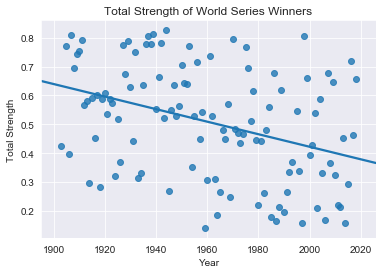

,yearID,Total Strength
yearID,1.000000,-0.374446
Total Strength,-0.374446,1.000000


In [82]:
# Plot of the Total Strength of World Series Winners
sns.regplot(x="yearID", y="Total Strength", data=WC, ci=None)
plt.xlabel("Year")
plt.ylabel("Total Strength")
plt.title("Total Strength of World Series Winners")
plt.show()
WC.loc[:, ["yearID", "Total Strength"]].corr()

In [83]:
# Code from: https://stackoverflow.com/questions/41654949/pandas-style-function-to-highlight-specific-columns
def highlight_cols_powderblue(s):
    return 'background-color: powderblue'

def highlight_cols_lightskyblue(s):
    return 'background-color: lightskyblue'

In [84]:
# WClite is a smaller version of WC with only the most important info for poster
WClite = WC.loc[:, ["yearID", "name", "W", "L", "WinPct", "PythWinPct",
                  "Elo", "BoundaryWinPct", "Total Strength"]]
WClite.rename(columns={"yearID": "Year", "name": "Team", "BoundaryWinPct": "SurroundingWinPct"}, inplace=True)
WClite = WClite.round({"WinPct": 3, "PythWinPct": 3, "SurroundingWinPct": 3, "Total Strenth": 3})
final = WClite.nsmallest(5, "Total Strength").reset_index(drop=True).round(3)
final.style.applymap(highlight_cols_powderblue, subset=pd.IndexSlice[:, ['Total Strength']])

,Year,Team,W,L,WinPct,PythWinPct,Elo,SurroundingWinPct,Total Strength
0,1959,Los Angeles Dodgers,88,68,0.564,0.524,1525,0.513,0.142
1,2014,San Francisco Giants,88,74,0.543,0.536,1536,0.51,0.159
2,1997,Florida Marlins,92,70,0.568,0.547,1537,0.417,0.16
3,1987,Minnesota Twins,85,77,0.525,0.488,1514,0.496,0.166
4,2006,St. Louis Cardinals,83,78,0.516,0.512,1538,0.559,0.17


In [85]:
# Dataframe for Pythagenpat Win Percentage setion on poster
SmallPyth = SmallPyth.loc[:, ["yearID", "name", "W", "L", "R", "RA", "WinPct", "PythWinPct", "WinPctDiff"]].round(3)
SmallPyth.rename(columns={"yearID": "Year", "name": "Team", "WinPctDiff": "WinPct - PythWinPct"}, inplace=True)
SmallPyth.style.applymap(highlight_cols_lightskyblue, subset=pd.IndexSlice[:, ['PythWinPct']])

,Year,Team,W,L,R,RA,WinPct,PythWinPct,WinPct - PythWinPct
0,1987,Minnesota Twins,85,77,786,806,0.525,0.488,0.037
1,2006,St. Louis Cardinals,83,78,781,762,0.516,0.512,0.004
2,1959,Los Angeles Dodgers,88,68,705,670,0.564,0.524,0.04
3,1985,Kansas City Royals,91,71,687,639,0.562,0.533,0.029
4,2000,New York Yankees,87,74,871,814,0.54,0.533,0.007


In [86]:
# Dataframe for Elo setion on poster
SmallElo = SmallElo.loc[:, ["yearID", "name", "W", "L", "WinPct", "PythWinPct", "Elo", "EloRank"]].round(3).head()
SmallElo.rename(columns={"yearID": "Year", "name": "Team", "EloRank": "All-Time Elo Rank"}, inplace=True)
SmallElo.style.applymap(highlight_cols_lightskyblue, subset=pd.IndexSlice[:, ['Elo']])

,Year,Team,W,L,WinPct,PythWinPct,Elo,All-Time Elo Rank
0,1987,Minnesota Twins,85,77,0.525,0.488,1514,1124
1,1959,Los Angeles Dodgers,88,68,0.564,0.524,1525,860
2,2014,San Francisco Giants,88,74,0.543,0.536,1536,620
3,1985,Kansas City Royals,91,71,0.562,0.533,1536,621
4,2003,Florida Marlins,91,71,0.562,0.538,1537,590


In [87]:
# Dataframe for Boundary Win Percentage setion on poster
BoundarySmall = BoundarySmall.loc[:, ["yearID", "name", "W", "L", "WinPct", "PythWinPct", "BoundaryWinPct"]].round(3)
BoundarySmall.rename(columns={"yearID": "Year", "name": "Team"}, inplace=True)
BoundarySmall.style.applymap(highlight_cols_lightskyblue, subset=pd.IndexSlice[:, ['BoundaryWinPct']])

,Year,Team,W,L,WinPct,PythWinPct,BoundaryWinPct
0,1997,Florida Marlins,92,70,0.568,0.547,0.417
1,2013,Boston Red Sox,97,65,0.599,0.622,0.454
2,1988,Los Angeles Dodgers,94,67,0.584,0.563,0.472
3,1969,New York Mets,100,62,0.617,0.568,0.472
4,1990,Cincinnati Reds,91,71,0.562,0.567,0.482
